In [1]:
%matplotlib inline

import sys
import time

#
import numpy as np

#
from astropy.io import fits
import astropy.units as u
import astropy.constants as c
import astropy.wcs as wcs

import FITS_tools as fits_tools

#
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#
sys.path.insert(0, '/Users/hopechen/Documents/projects/git_projects/radfil/')
from radfil import radfil_class, styles

# Tests

This notebook is to test all combination of setup parameters in `RadFil`, in preparation for publication of the codes.

## Data

The dataset used in the tests is mainly the *Herschel* column denisty map of the B5 region in Perseus.  Other datasets that can be used in the tests include the *Herschel* column density map of the Musca region and integrated density derived from Enzo simulations.

In [2]:
# B5
direcData = '/Users/hopechen/Documents/projects/git_projects/radfil/tests/data/'
data = fits.open(direcData+'image_PerB5.fits')[0]
image, header = data.data, data.header
mask = fits.open(direcData+'mask_PerB5.fits')[0].data.astype(bool)

# Parameters that are kept the same throughout the tests
## __init__
distance = 260.
## make_fil_spine
beamwidth = 42.
## build_profile
bins0 = 20 ## The number is used when binning is used to derive the profile.
##
bgdist, fitdist, fitfunc = (1., 2.), 1., 'Gaussian'

*Below is an overview of the input data.*

//anaconda/lib/python2.7/site-packages/matplotlib/colors.py:1018: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


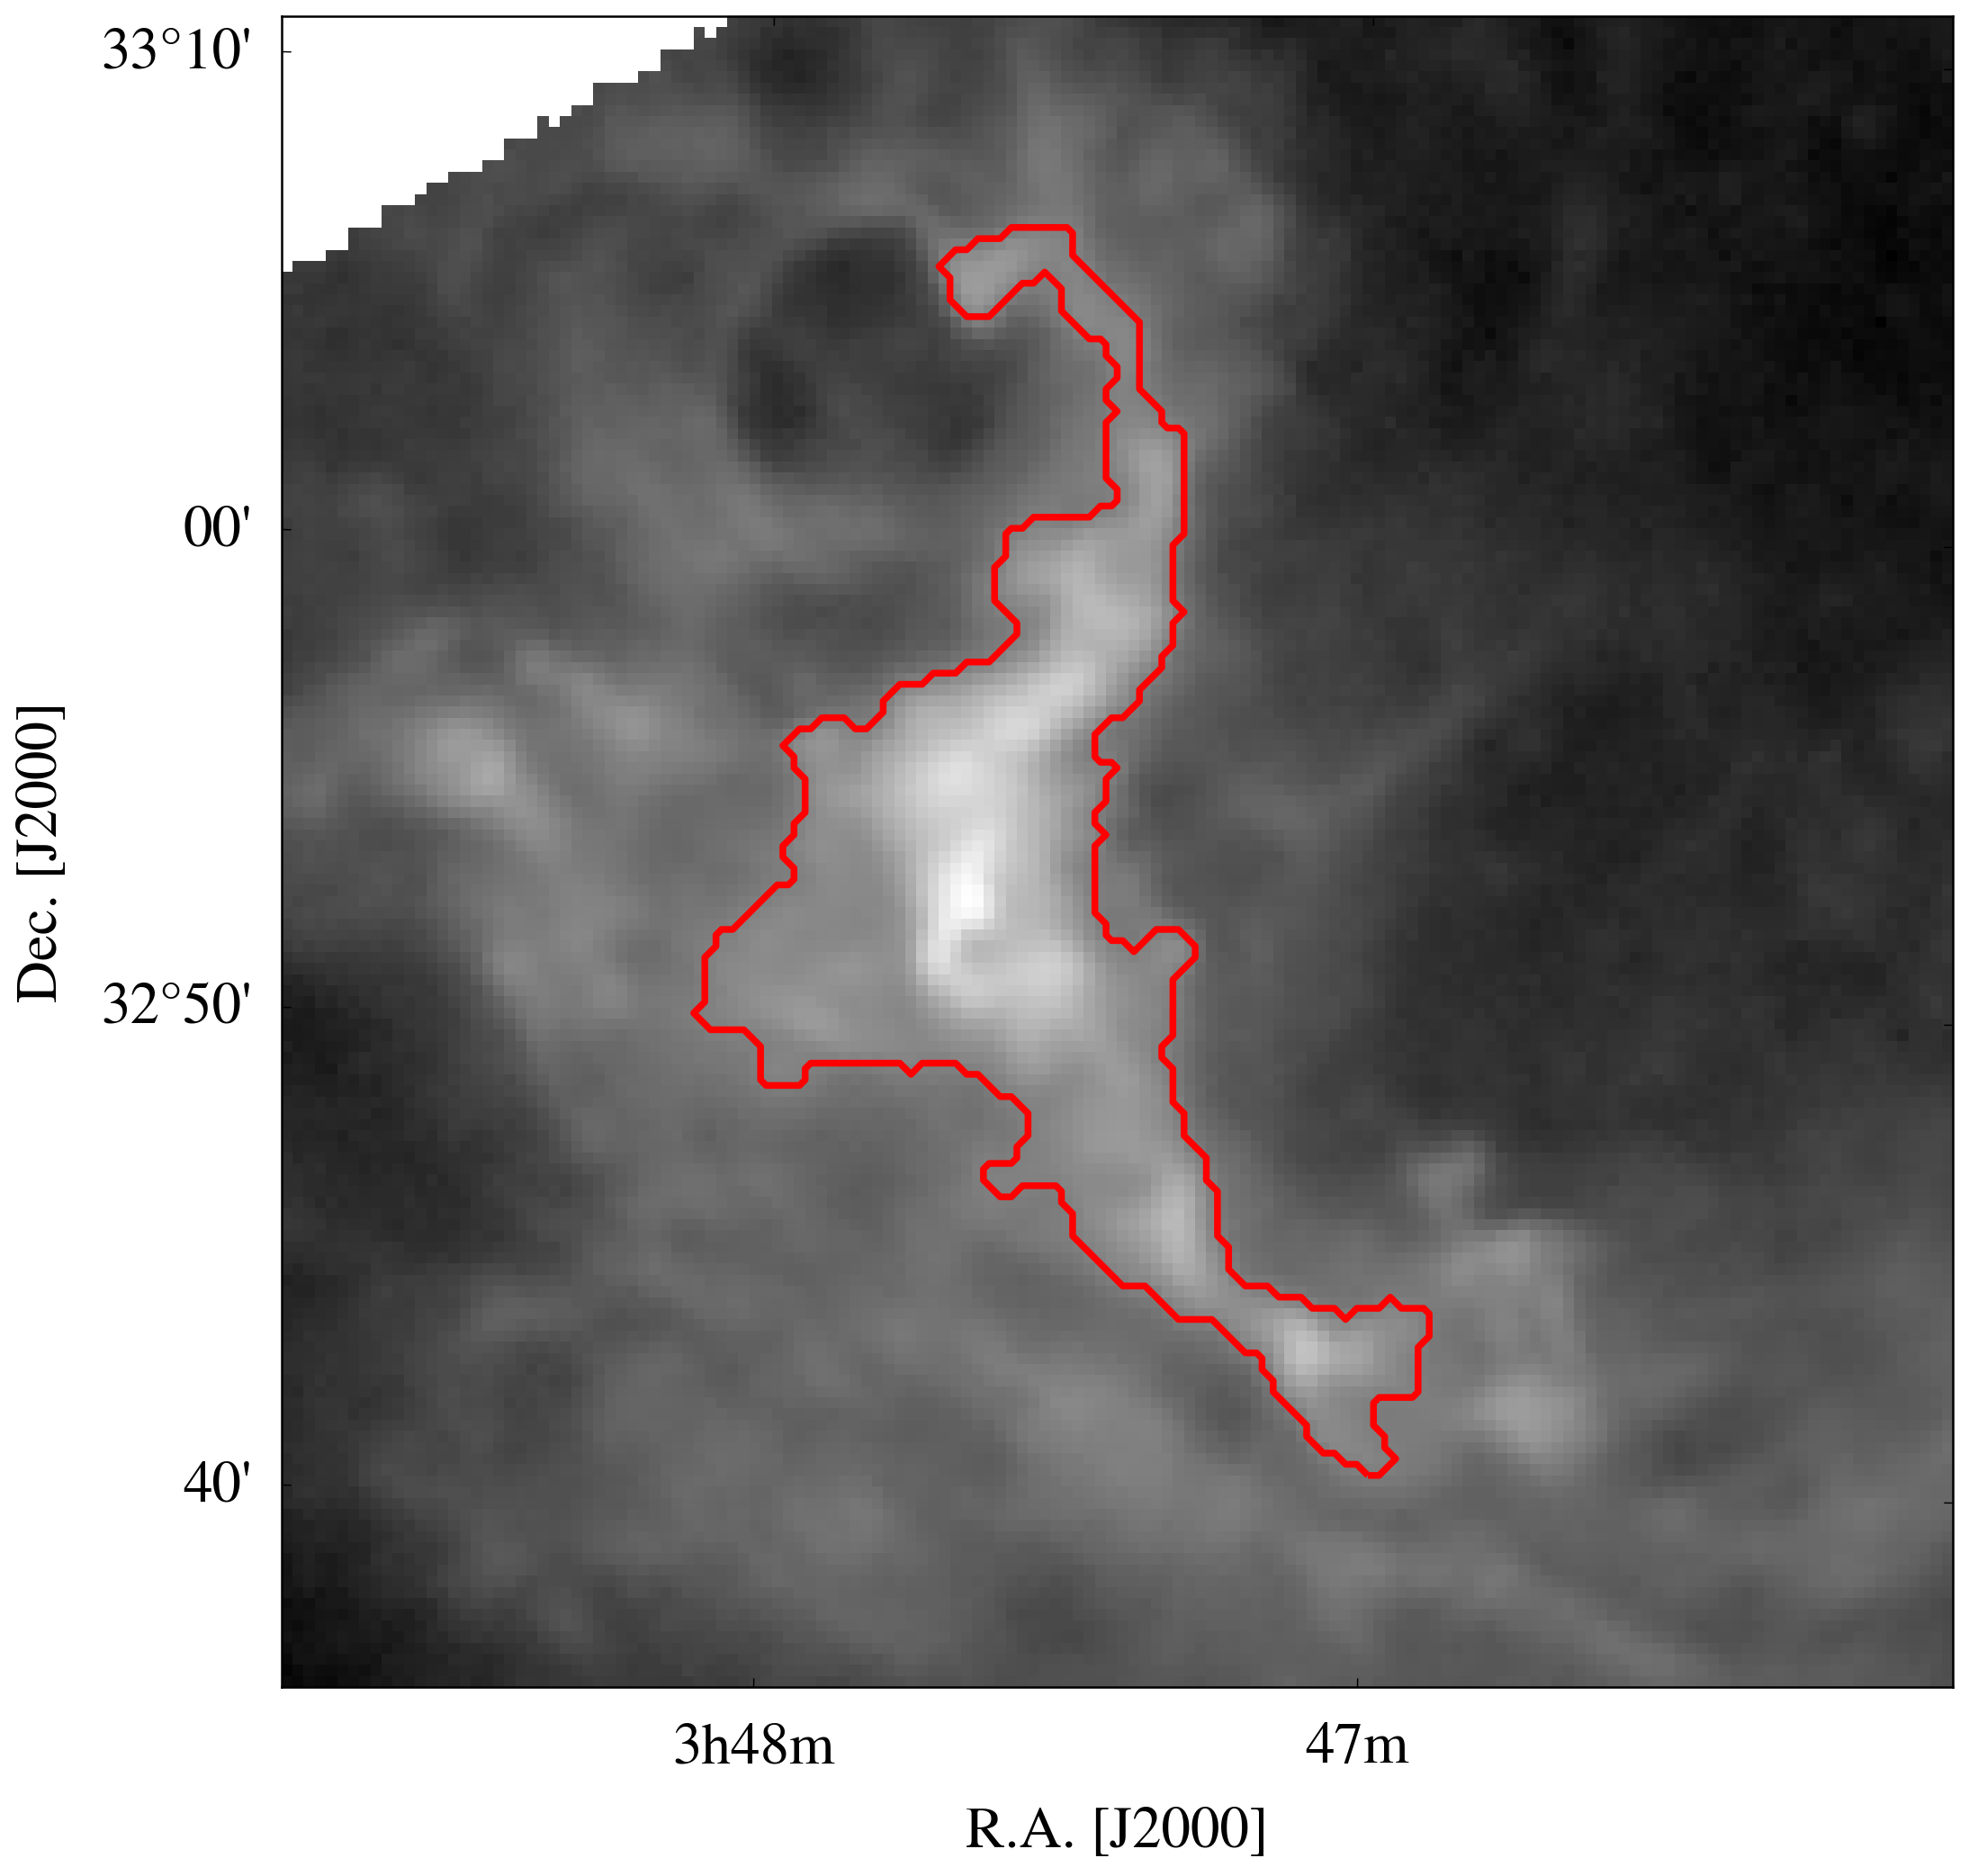

In [3]:
# An overview of the data used in the tests
fig = plt.figure(figsize = (16., 12.))
## header (used to provide proper projection in the following plotting codes)
ax = fig.gca(projection = wcs.WCS(header))

## image
ax.imshow(image,
          cmap = 'gray',
          norm = colors.LogNorm())

## mask
ax.contour(mask,
           levels = [.5],
           colors = 'r',
           linewidths = 3.)

## (plotting adjustments)
ax.coords[0].set_axislabel('R.A. [J2000]')
ax.coords[0].set_major_formatter('hh:mm')
ax.coords[1].set_axislabel('Dec. [J2000]')

## Set up the tests

### Load the data and derive the spine

The steps of loading the data and deriving the spine are kept the same for all subsequent tests using varying setup parameters.

This step uses codes in the following features of `radfil_class`:

1. `__init__`
2. `make_fil_spine`

In [4]:
%time
# __init__
radfil = radfil_class.radfil(image, mask, header = header, distance = distance)

# make_fil_spine
radfil.make_fil_spine(beamwidth = 42.)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 5.96 µs


//anaconda/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3223: RuntimeWarning: overflow encountered in exp
  p = np.exp(s*s)
//anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:681: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


### Build and fit the profile

This step is the main part to be tested in this notebook.  The four main parameters to test are (1) whether binning is carried out, (2) whether to shift the profile w.r.t. the peak, (3) whether to wrap the profile around the zero point in the distance axis, and (4) whether to sample the profile by making cuts perpendicular to the spine.  These parameters are denoted by `bins`, `shift`, `wrap`, and `cut` in the codes.  All 16 combinations are tested, even though not all of them are practical.  The step of `fit_profile` is kept the same for all combinations.

The codes involved in this step are:

1. `build_profile`
2. `fit_profile`

No binning is applied.
The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====

samp_int is not used. cut is False.
shift and/or wrap are not used. cut is False.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



amplitude: 3.364E+21
width: 0.171
----
bins: None ; shift: False ; wrap: False ; cut: False
runtime: 1.80
----
No binning is applied.
==== Gaussian ====
amplitude: 3.851E+21
width: 0.115
----

A beamwidth is not found. Deconvolved FWHMs cannot be derived.
samp_int is not used. cut is False.



bins: None ; shift: False ; wrap: False ; cut: True
runtime: 0.47
----
No binning is applied.
The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====
amplitude: 3.364E+21
width: 0.171
----
bins: None ; shift: False ; wrap: True ; cut: False
runtime: 1.83
----
No binning is applied.

A beamwidth is not found. Deconvolved FWHMs cannot be derived.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====
amplitude: 3.850E+21
width: 0.116
----
bins: None ; shift: False ; wrap: True ; cut: True
runtime: 0.38
----
No binning is applied.
The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====

samp_int is not used. cut is False.
shift and/or wrap are not used. cut is False.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



amplitude: 3.364E+21
width: 0.171
----
bins: None ; shift: True ; wrap: False ; cut: False
runtime: 1.92
----
No binning is applied.
==== Gaussian ====
amplitude: 3.816E+21
width: 0.114
----

A beamwidth is not found. Deconvolved FWHMs cannot be derived.
samp_int is not used. cut is False.



bins: None ; shift: True ; wrap: False ; cut: True
runtime: 0.46
----
No binning is applied.
The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====

shift and/or wrap are not used. cut is False.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



amplitude: 3.364E+21
width: 0.171
----
bins: None ; shift: True ; wrap: True ; cut: False
runtime: 1.84
----
No binning is applied.
The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====
amplitude: 3.812E+21
width: 0.116
----

A beamwidth is not found. Deconvolved FWHMs cannot be derived.
samp_int is not used. cut is False.



bins: None ; shift: True ; wrap: True ; cut: True
runtime: 0.47
----
The profile is wrapped. Use the 0th order polynomial in BG subtraction.

shift and/or wrap are not used. cut is False.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



==== Gaussian ====
amplitude: 1.898E+21
width: 0.368
----
bins: 20 ; shift: False ; wrap: False ; cut: False
runtime: 1.71
----
==== Gaussian ====

//anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:717: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



amplitude: 2.005E+21
width: 0.157
----

samp_int is not used. cut is False.
//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



bins: 20 ; shift: False ; wrap: False ; cut: True
runtime: 0.44
----
The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====
amplitude: 1.898E+21
width: 0.368
----
bins: 20 ; shift: False ; wrap: True ; cut: False
runtime: 1.86
----
The profile is wrapped. Use the 0th order polynomial in BG subtraction.

A beamwidth is not found. Deconvolved FWHMs cannot be derived.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



==== Gaussian ====
amplitude: 2.232E+21
width: 0.160
----
bins: 20 ; shift: False ; wrap: True ; cut: True
runtime: 0.56
----
The profile is wrapped. Use the 0th order polynomial in BG subtraction.

samp_int is not used. cut is False.
shift and/or wrap are not used. cut is False.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



==== Gaussian ====
amplitude: 1.898E+21
width: 0.368
----
bins: 20 ; shift: True ; wrap: False ; cut: False
runtime: 1.75
----
==== Gaussian ====
amplitude: 1.958E+21
width: 0.160
----

A beamwidth is not found. Deconvolved FWHMs cannot be derived.
samp_int is not used. cut is False.



bins: 20 ; shift: True ; wrap: False ; cut: True
runtime: 0.47
----
The profile is wrapped. Use the 0th order polynomial in BG subtraction.

shift and/or wrap are not used. cut is False.
A beamwidth is not found. Deconvolved FWHMs cannot be derived.



==== Gaussian ====
amplitude: 1.898E+21
width: 0.368
----
bins: 20 ; shift: True ; wrap: True ; cut: False
runtime: 1.74
----
The profile is wrapped. Use the 0th order polynomial in BG subtraction.
==== Gaussian ====
amplitude: 2.222E+21
width: 0.163
----
bins: 20 ; shift: True ; wrap: True ; cut: True
runtime: 0.37
----


A beamwidth is not found. Deconvolved FWHMs cannot be derived.


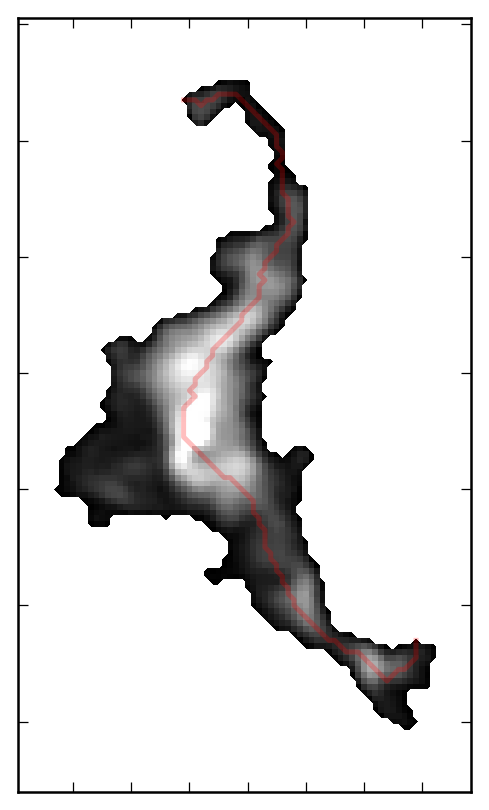

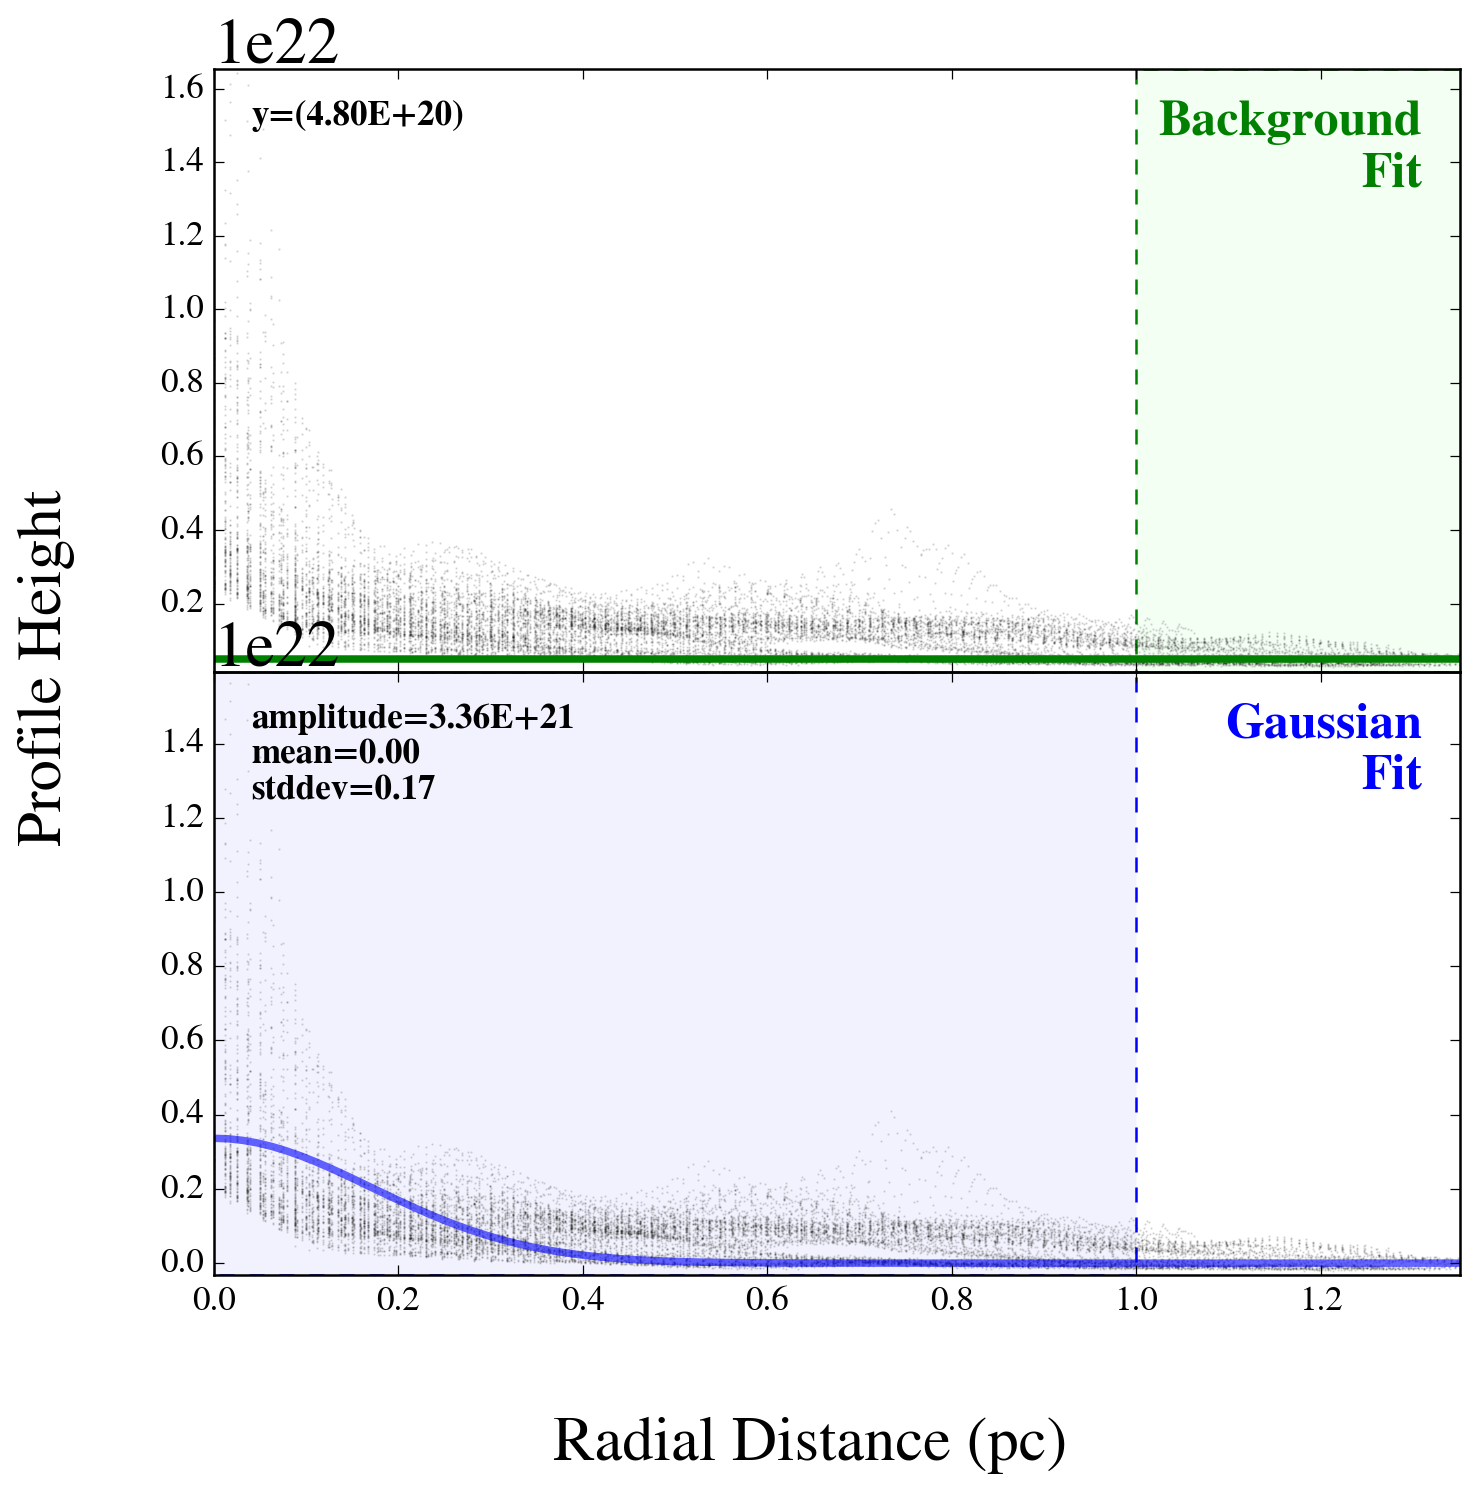

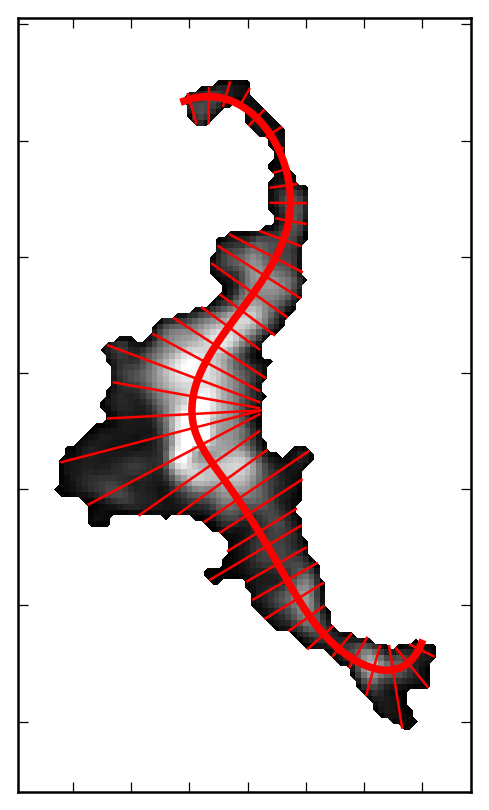

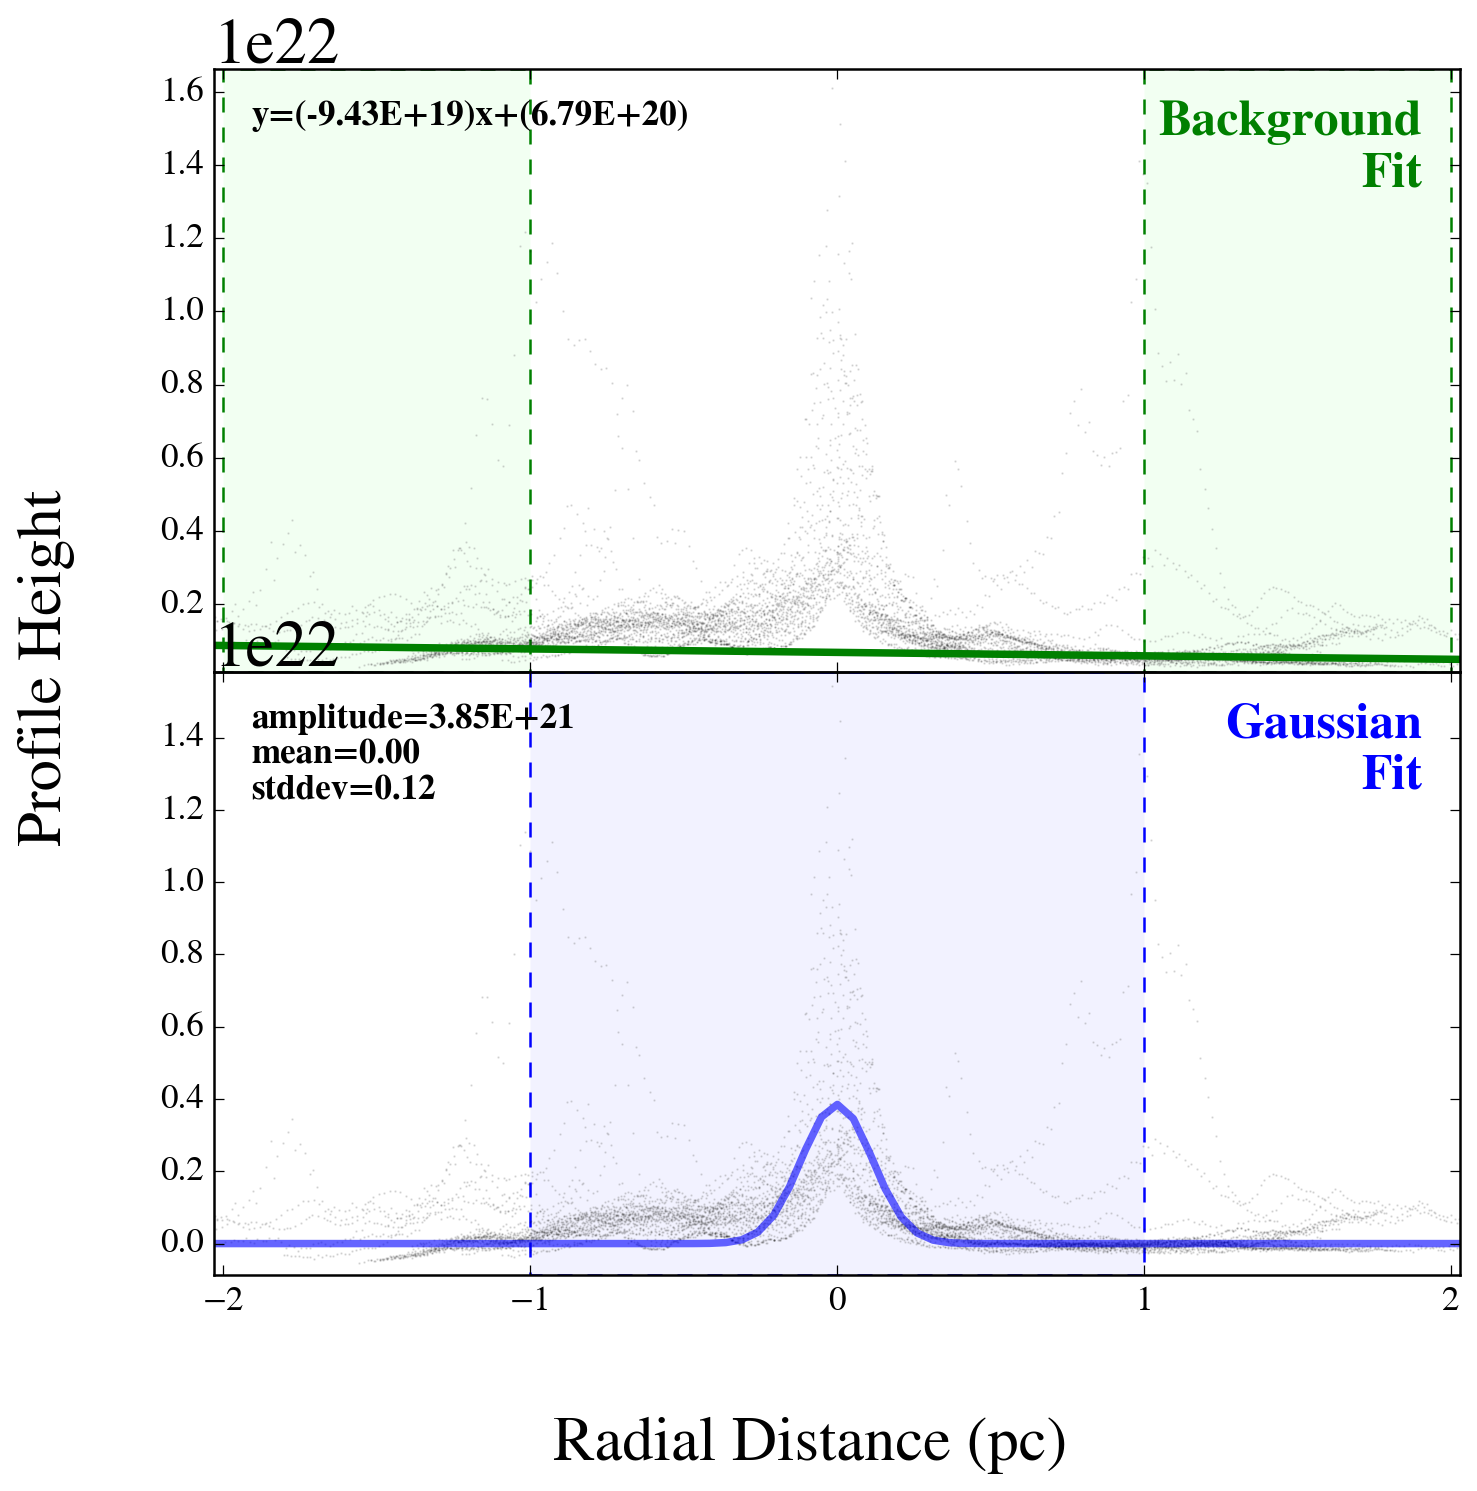

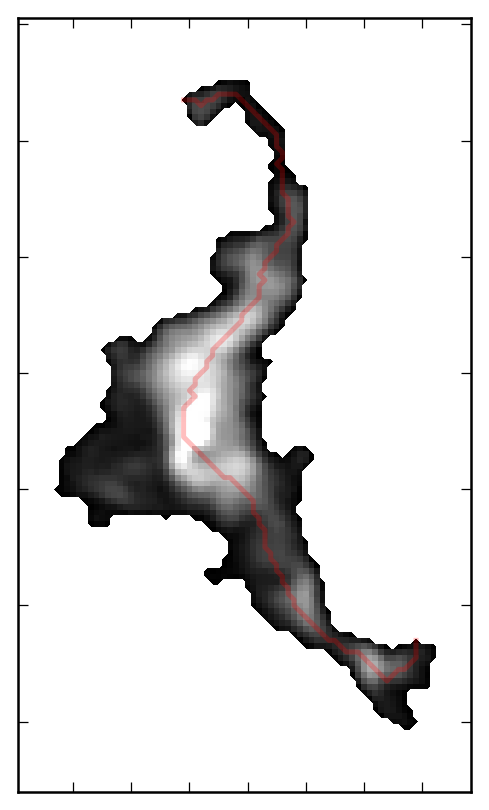

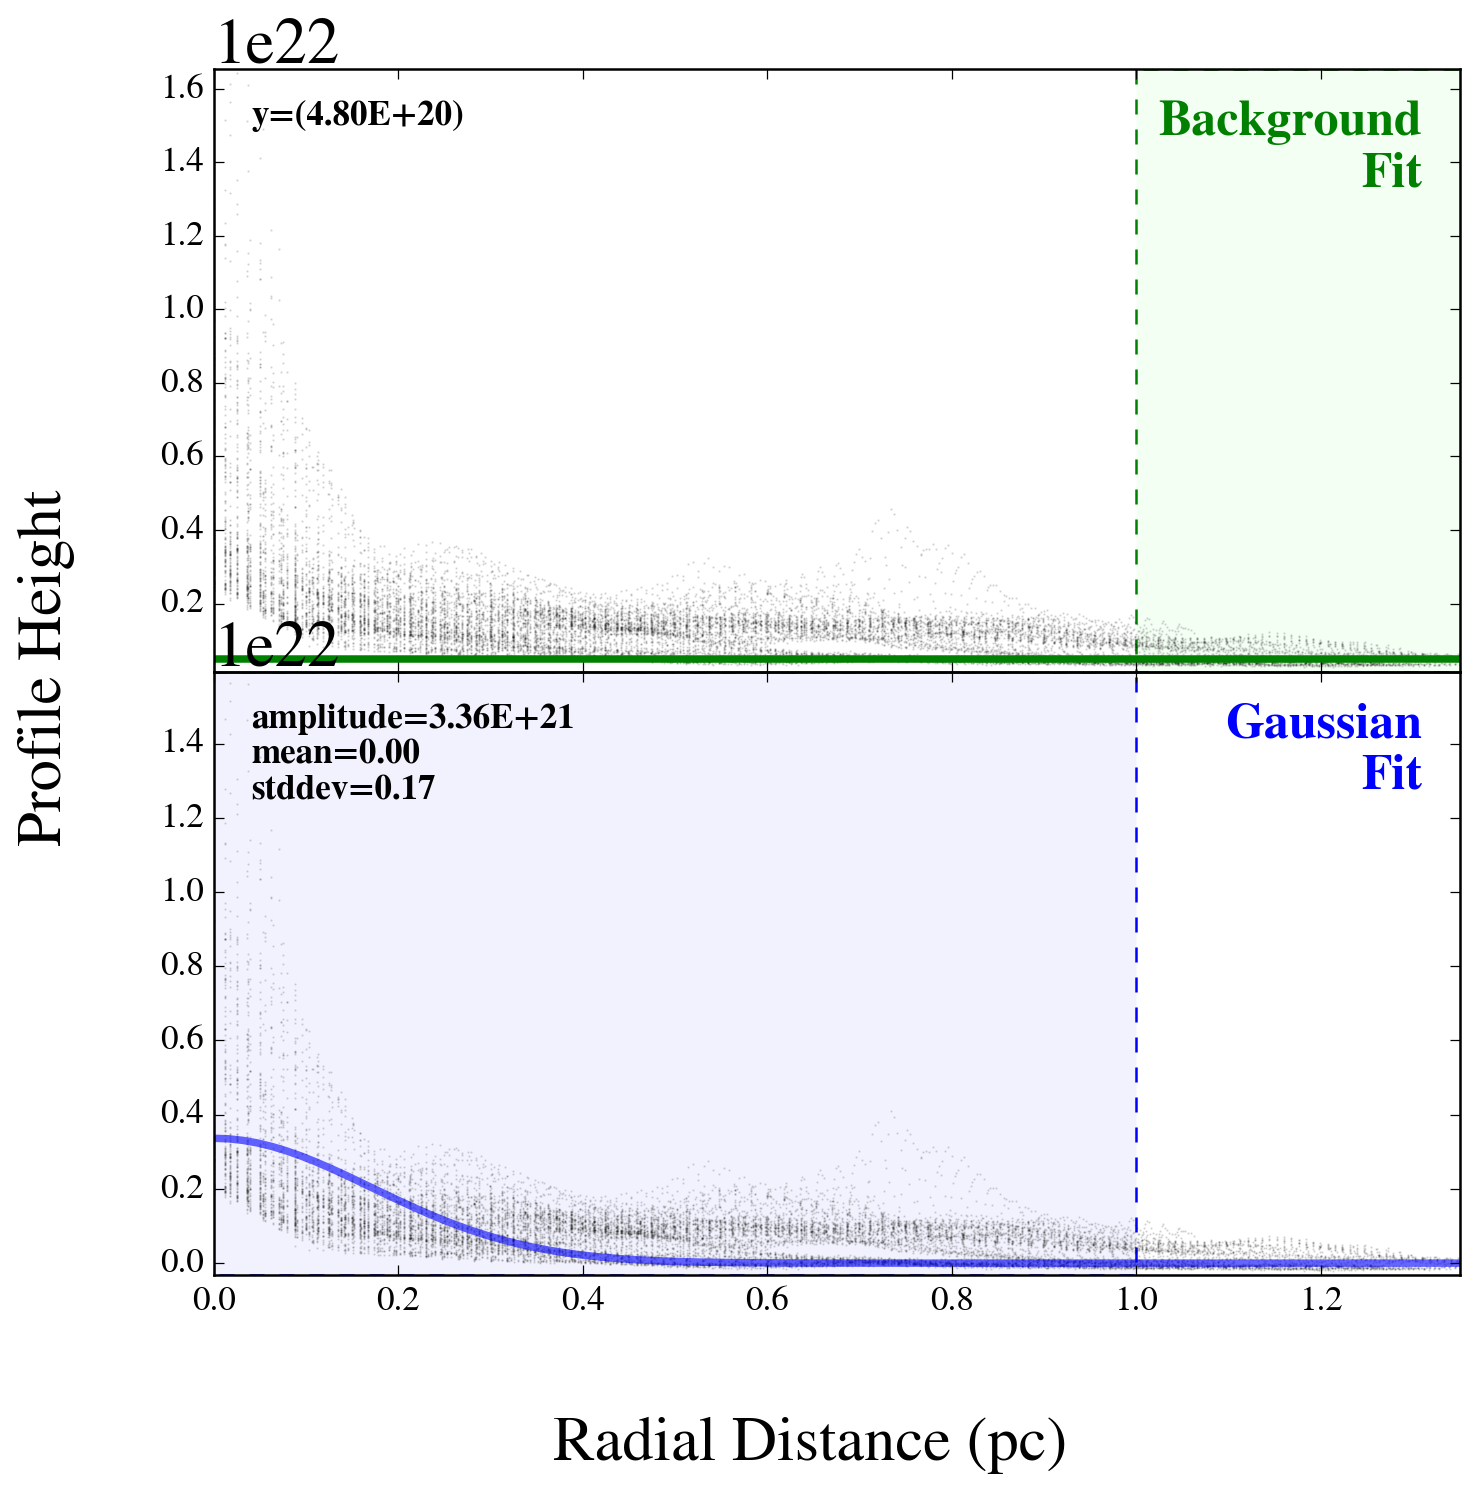

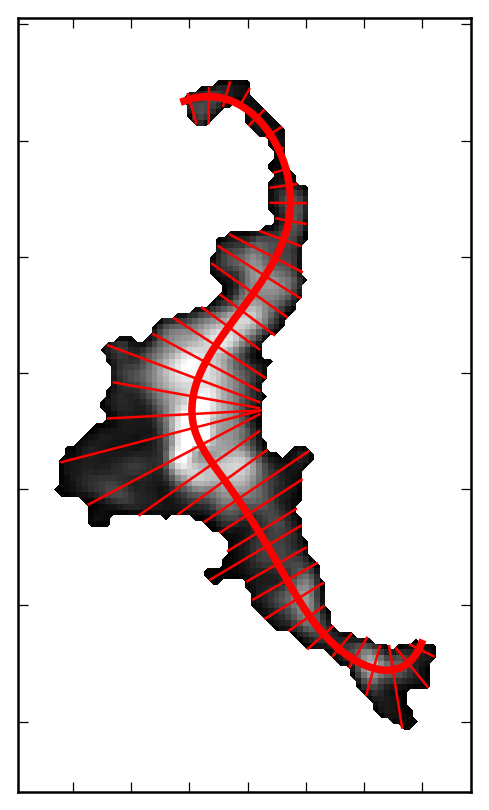

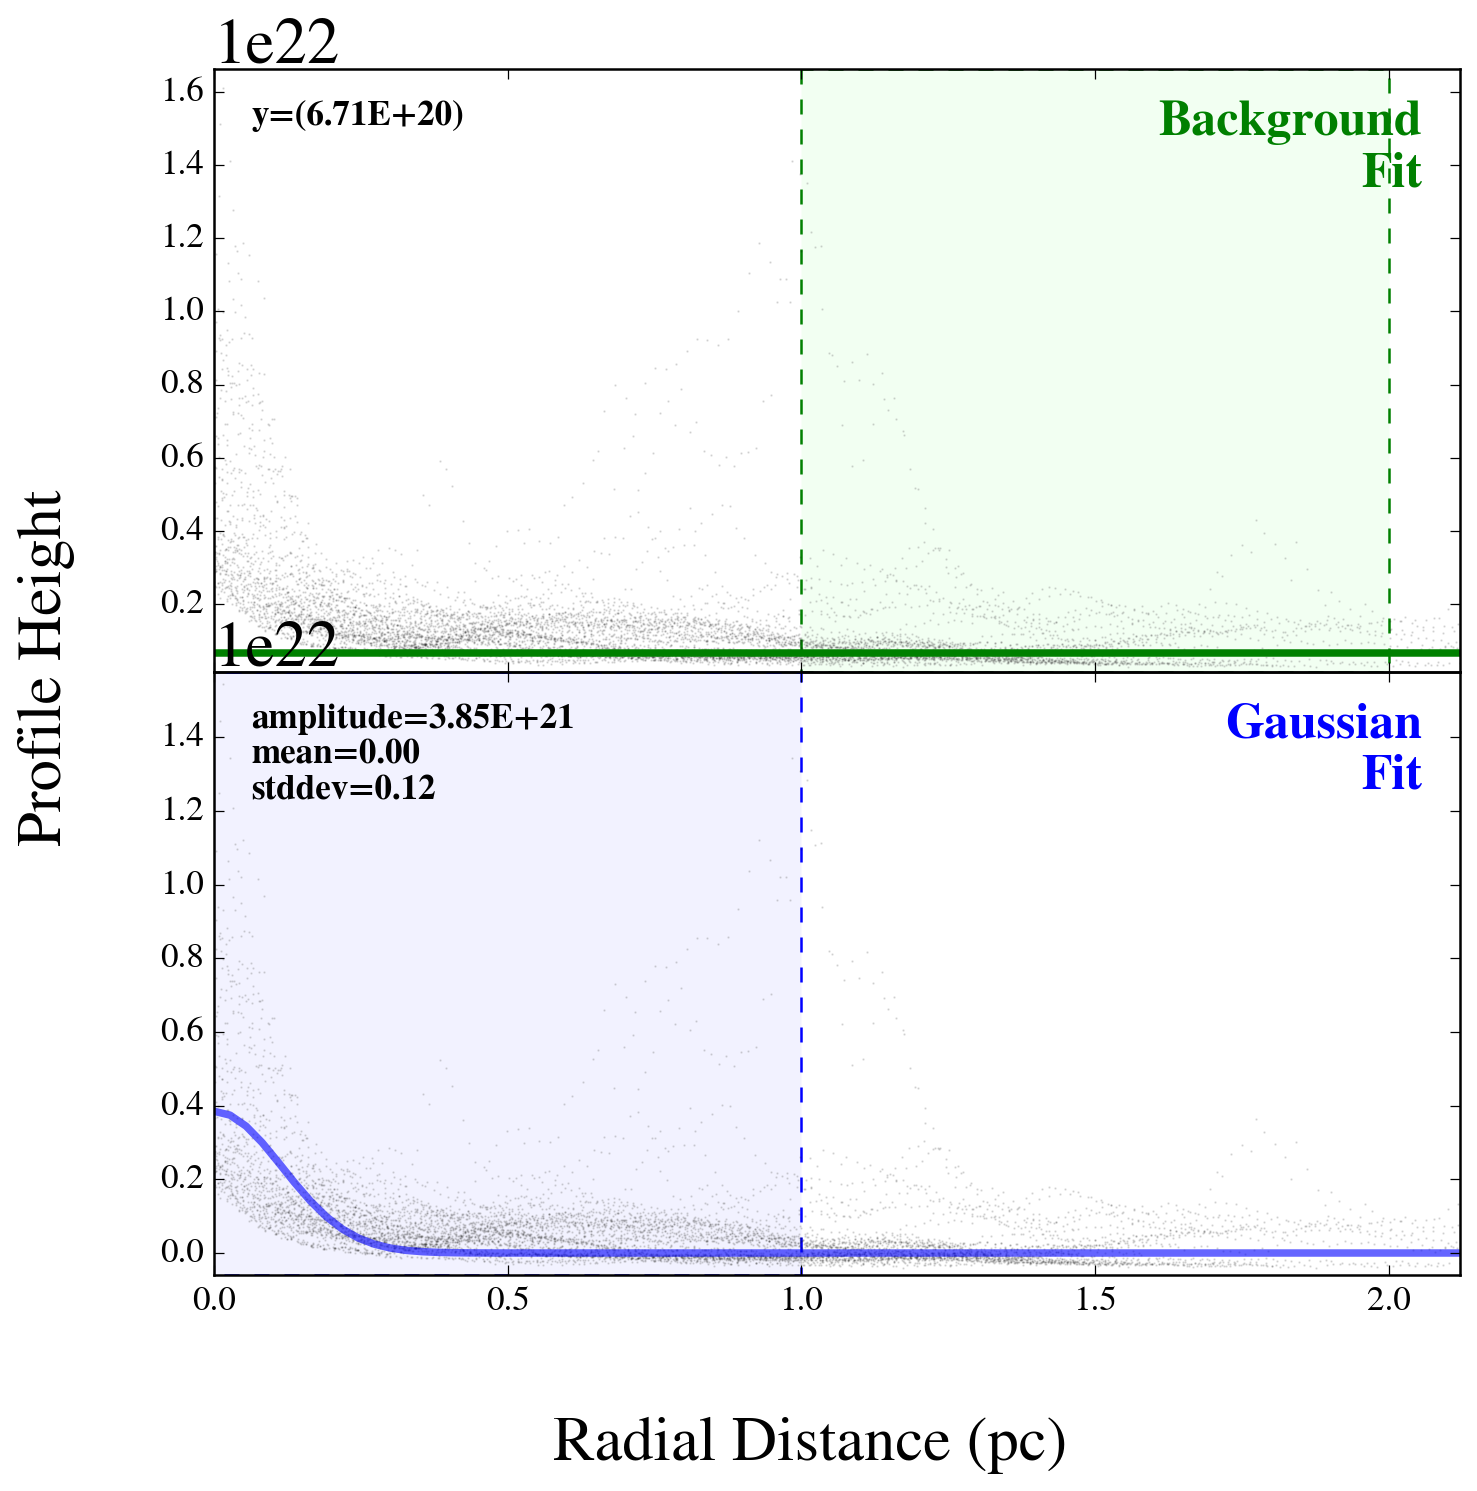

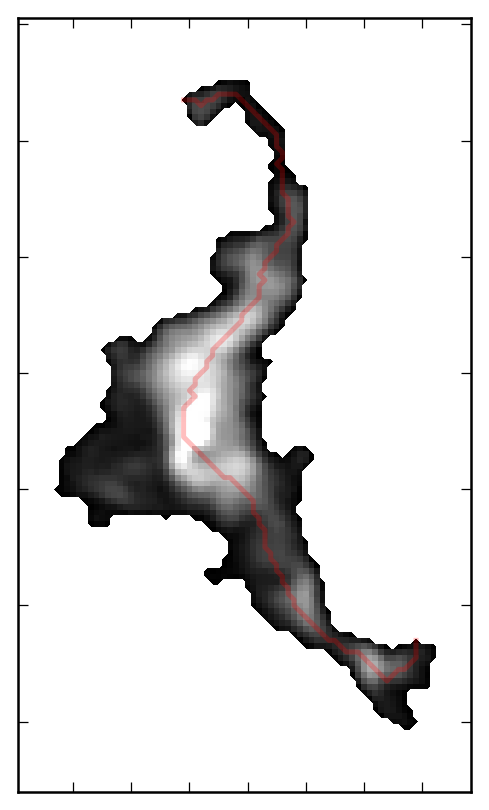

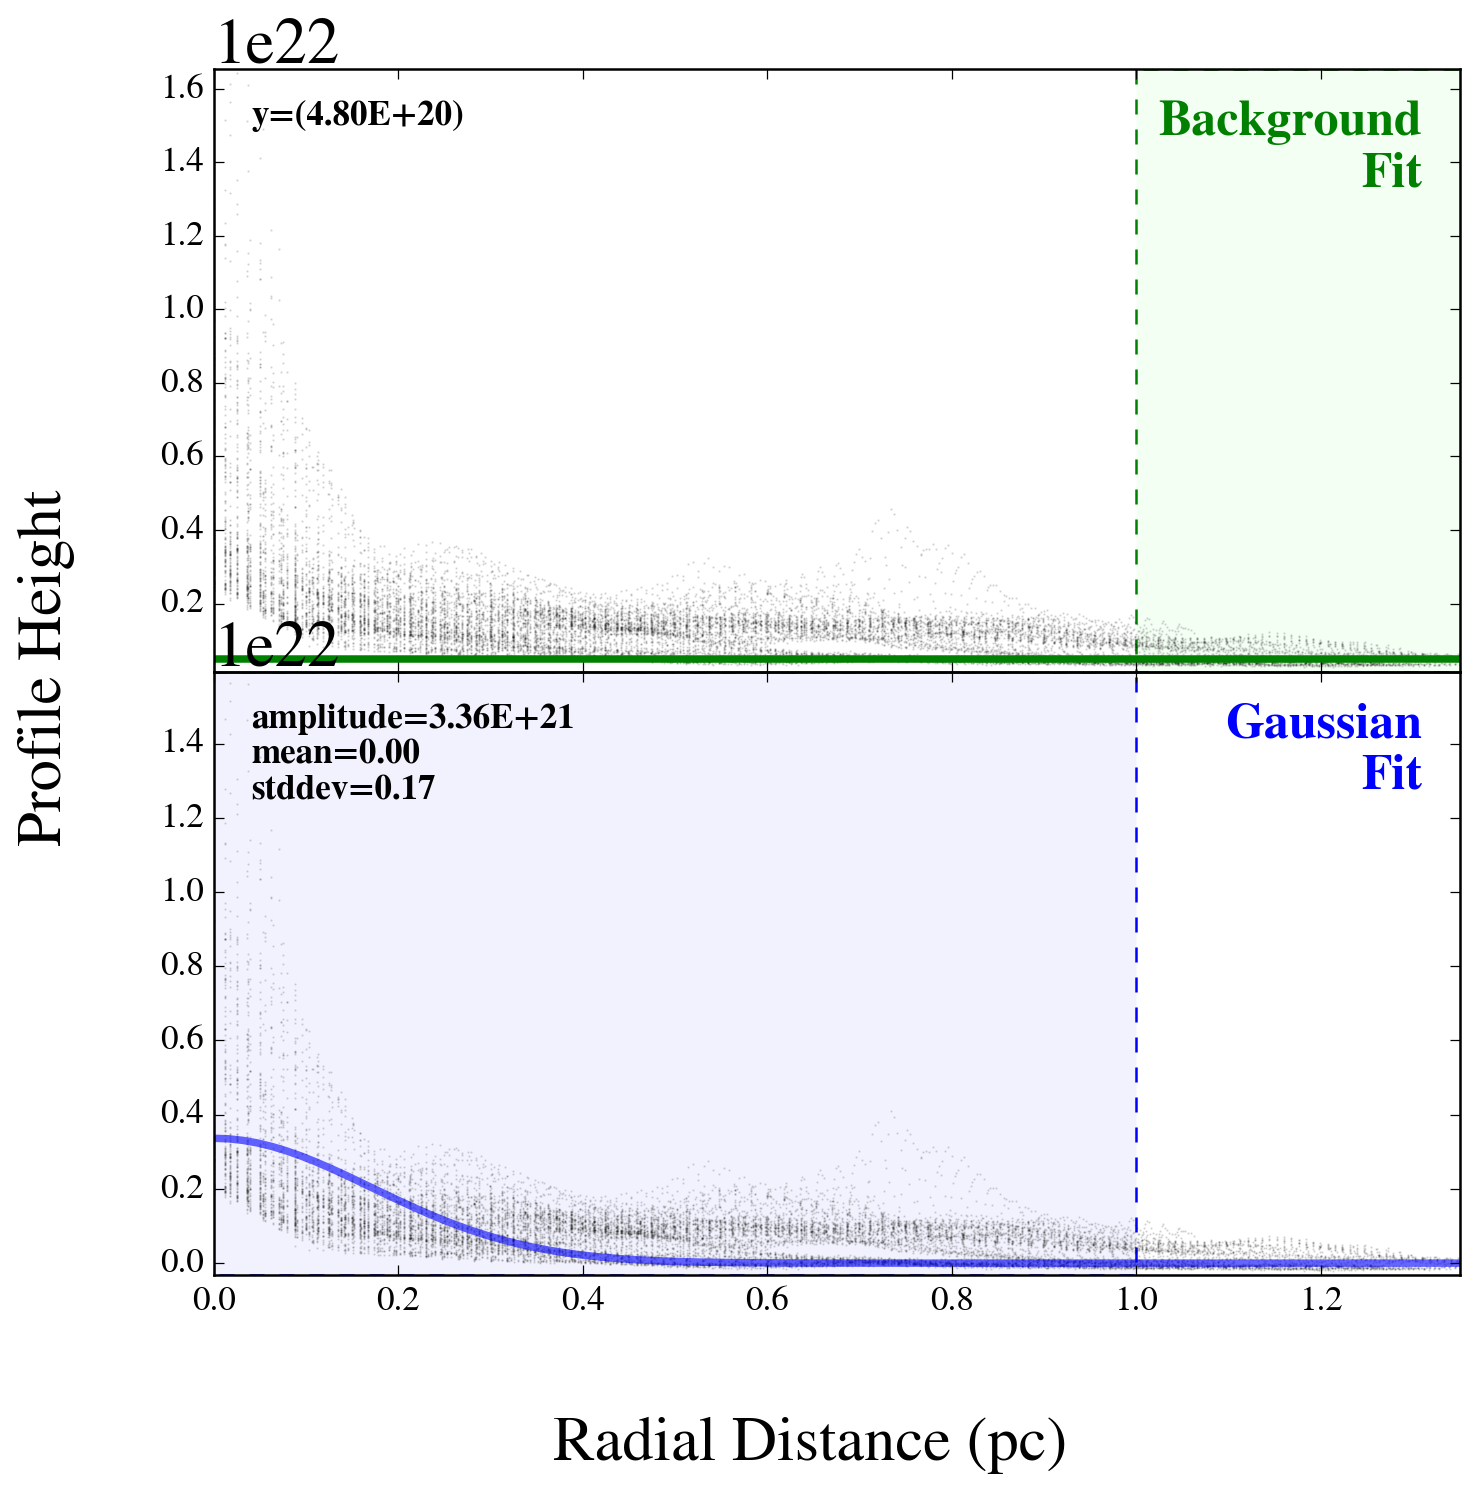

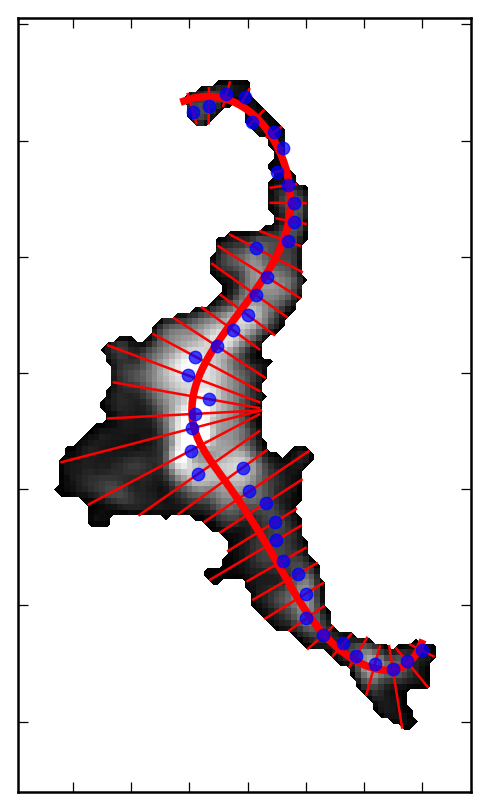

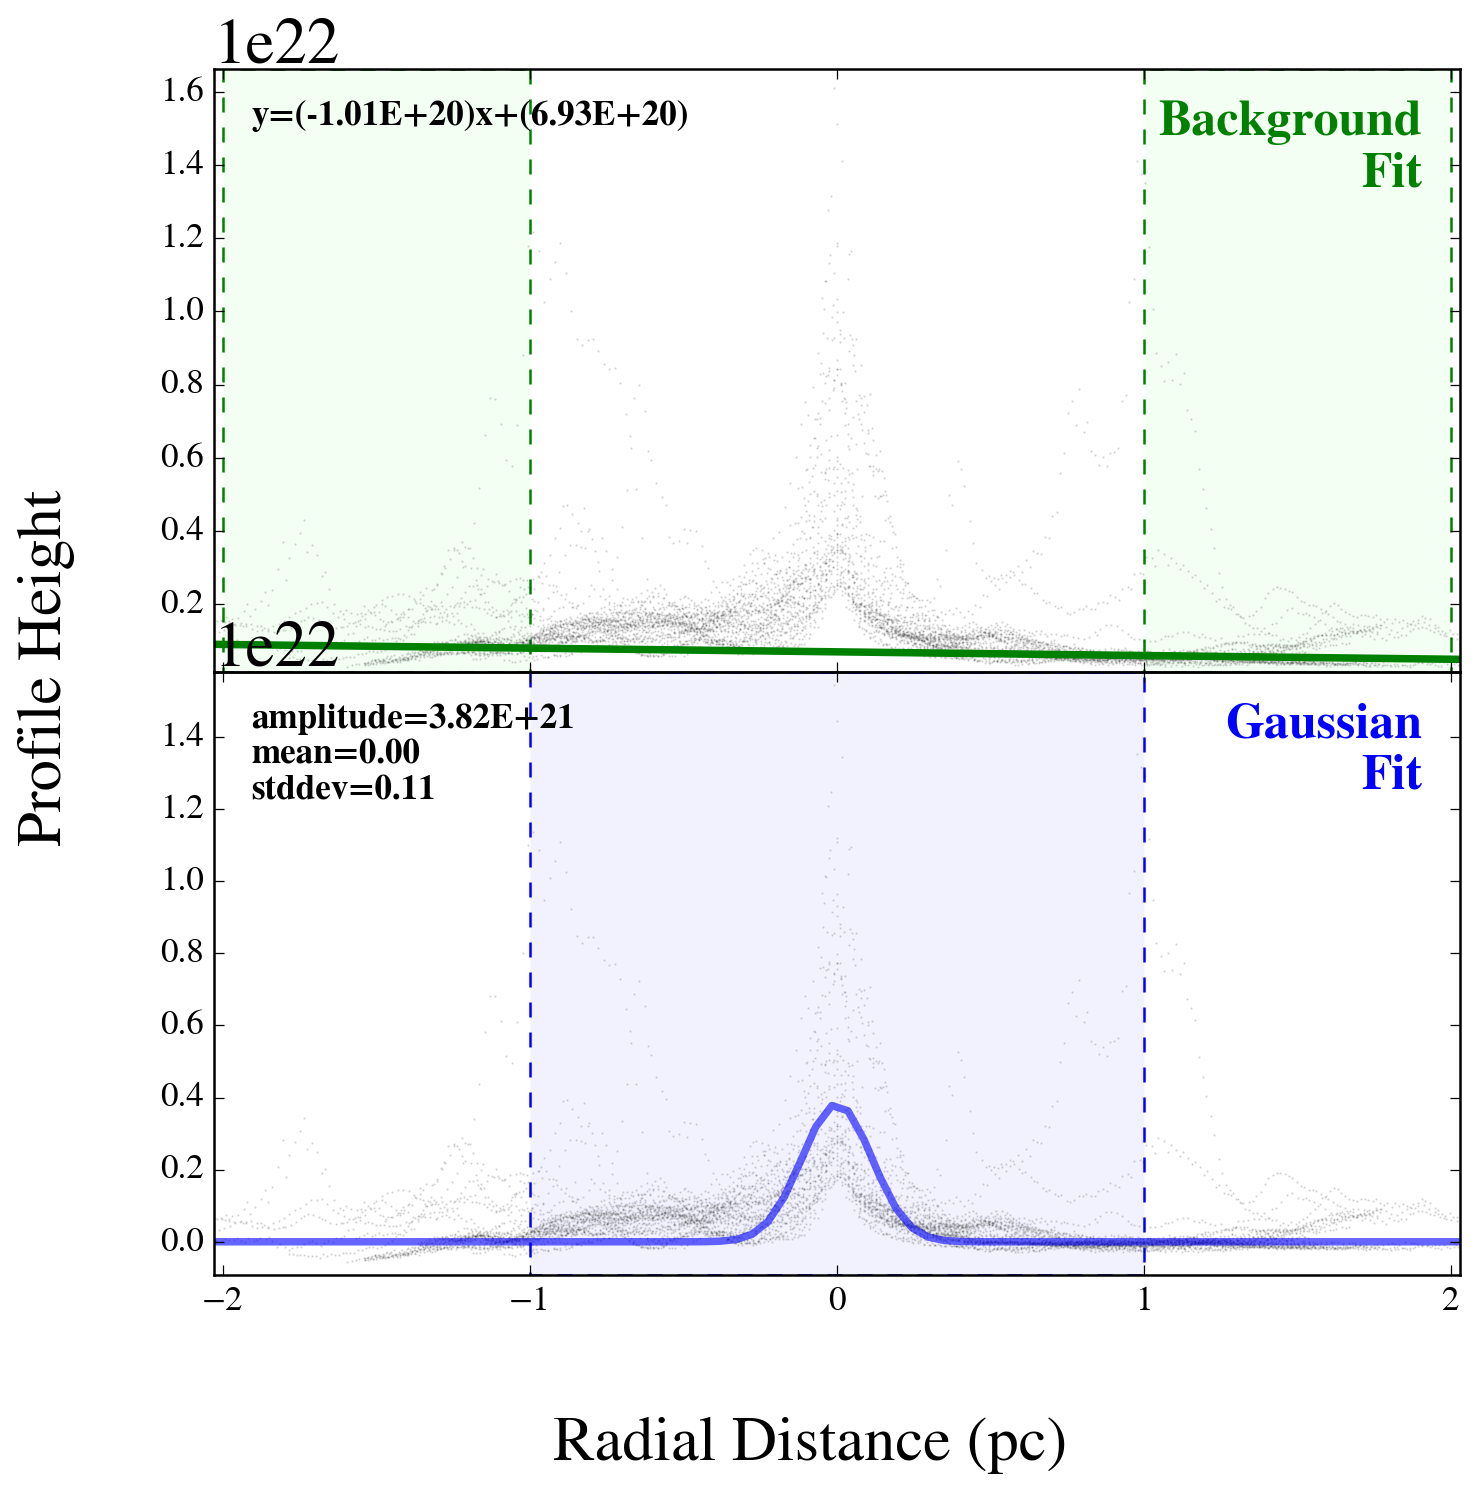

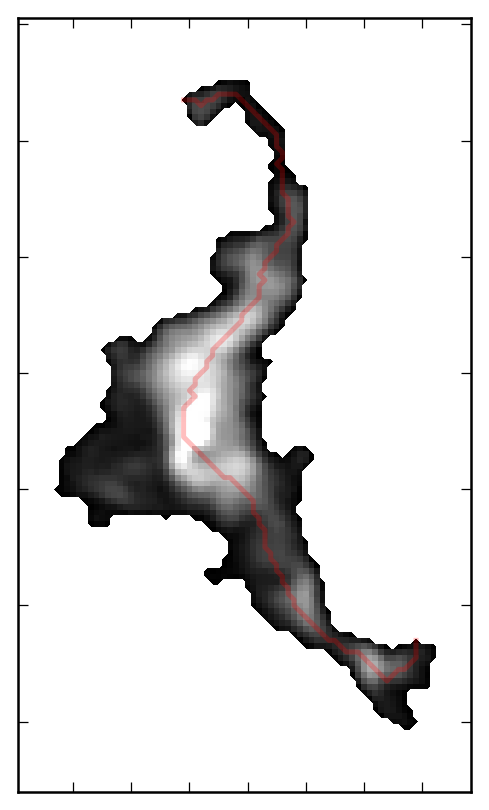

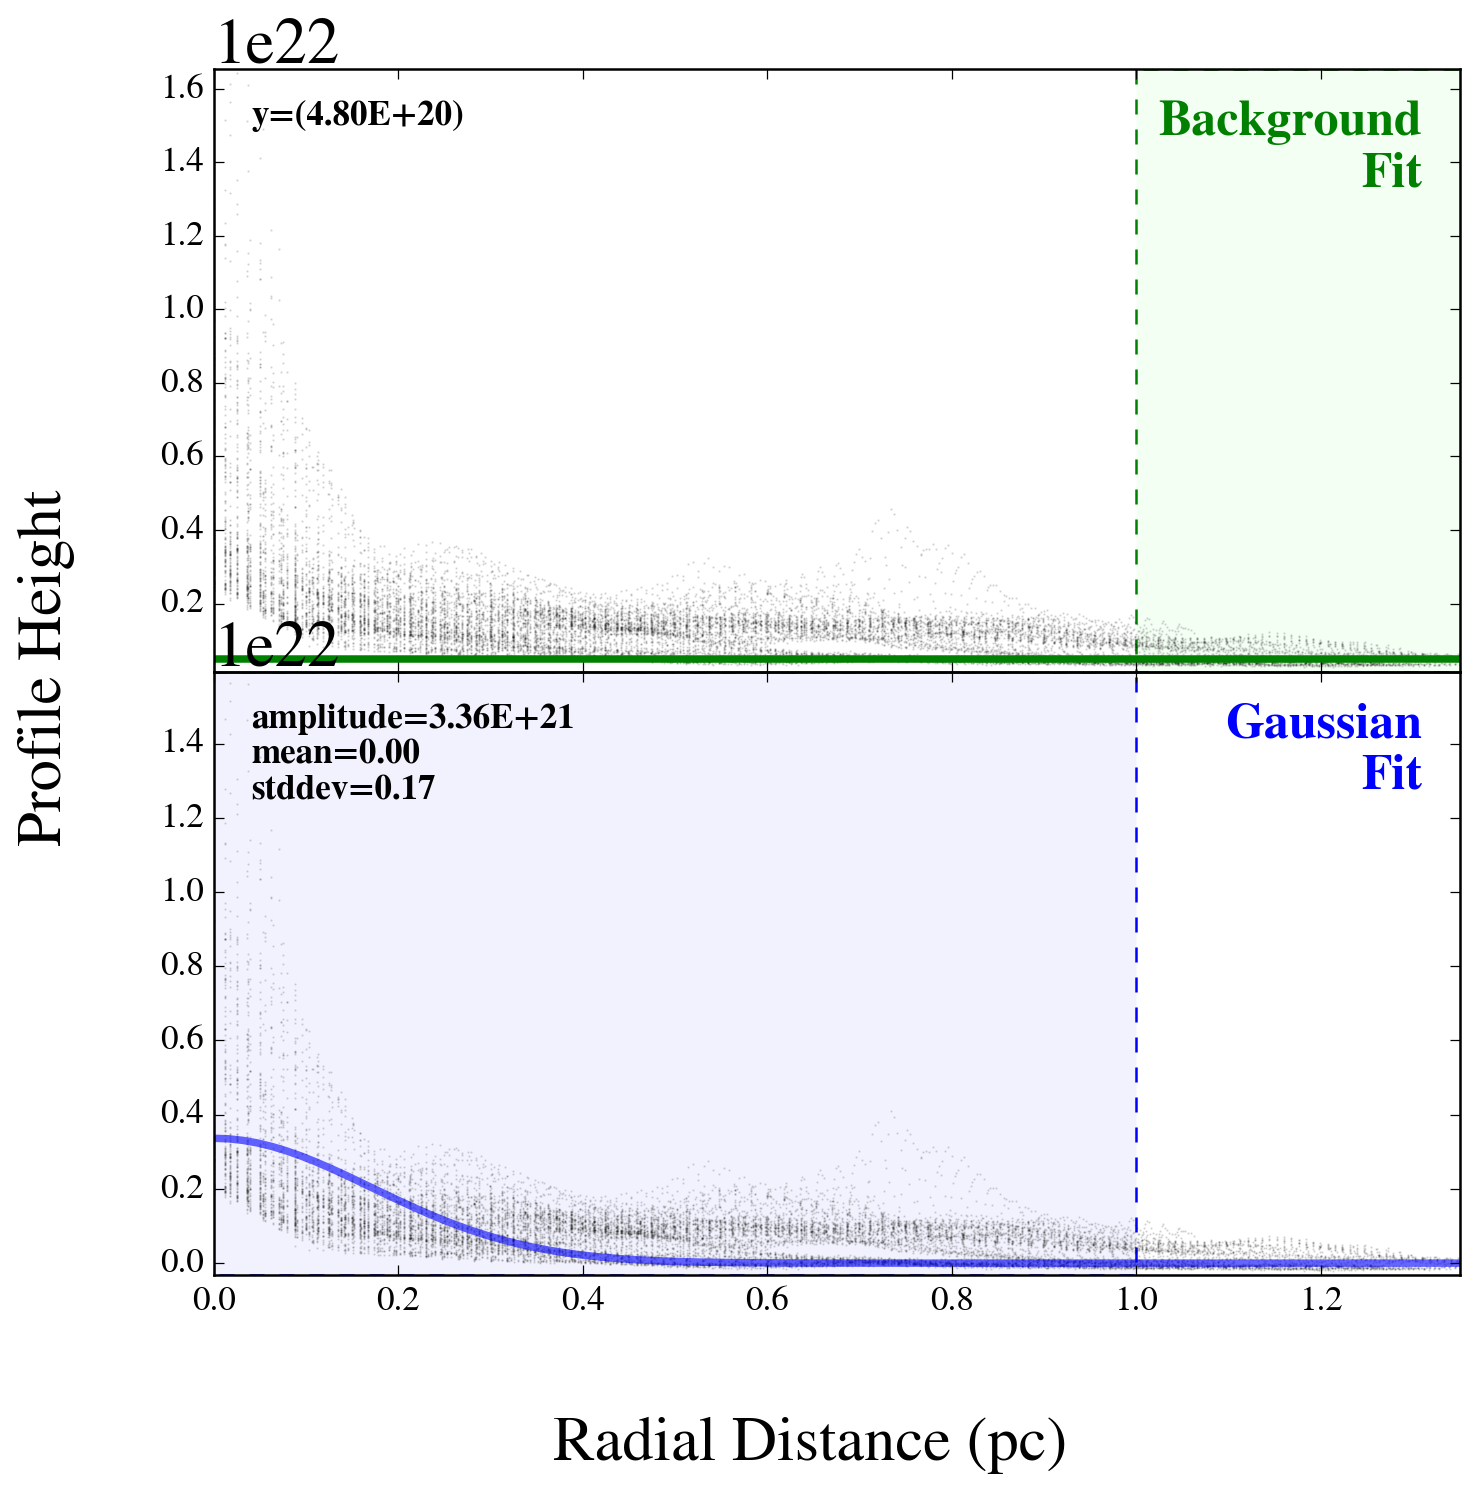

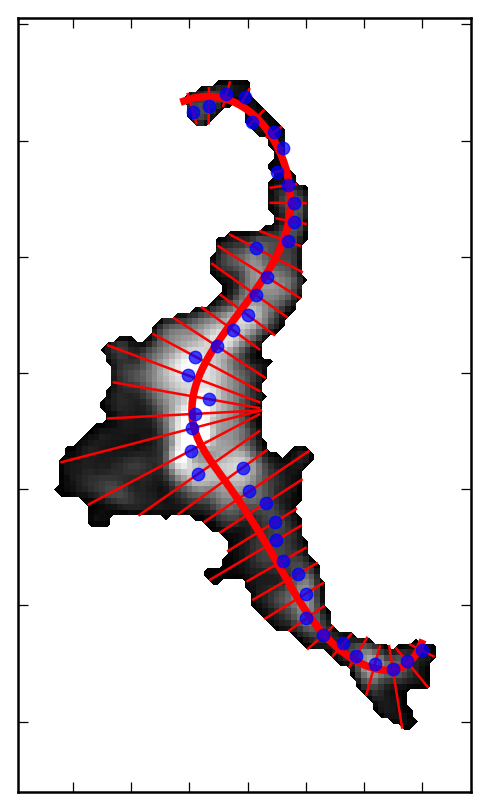

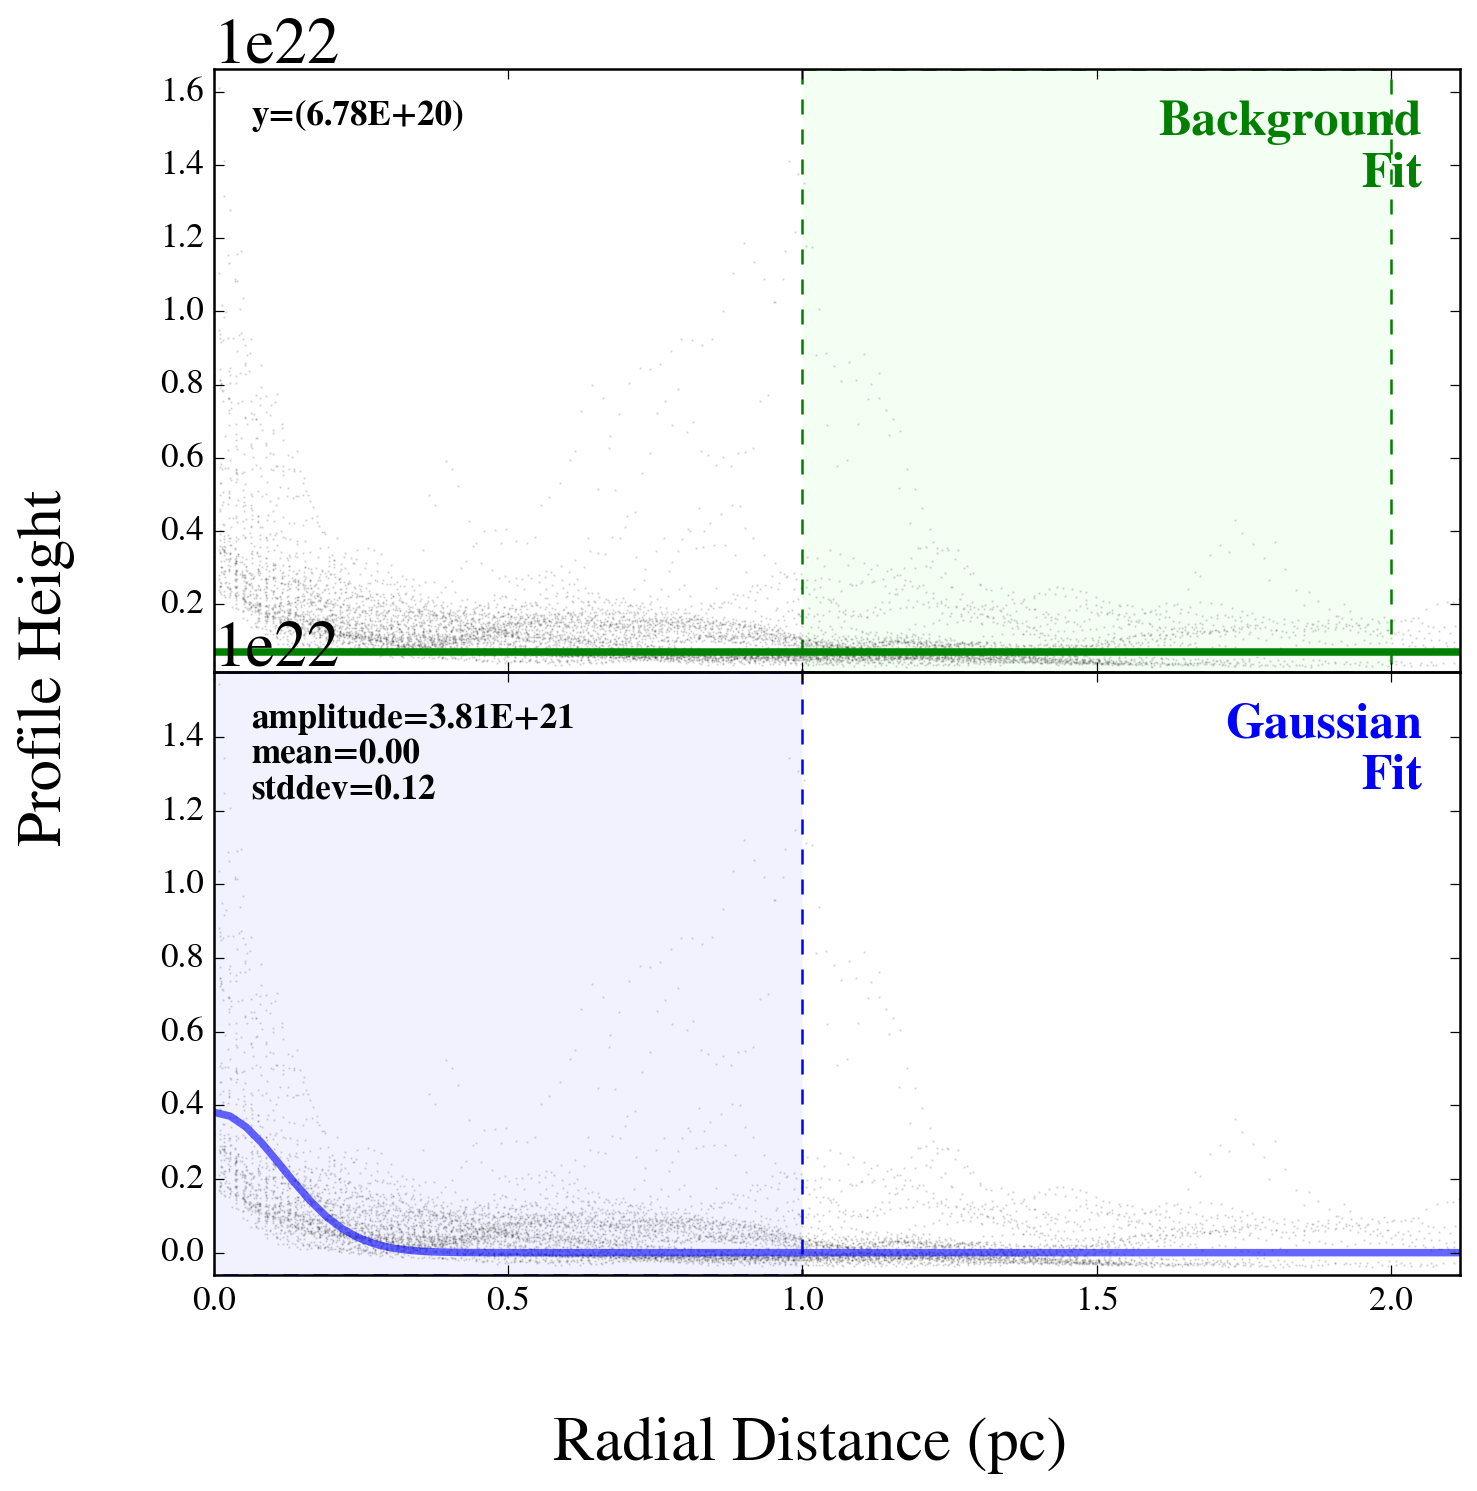

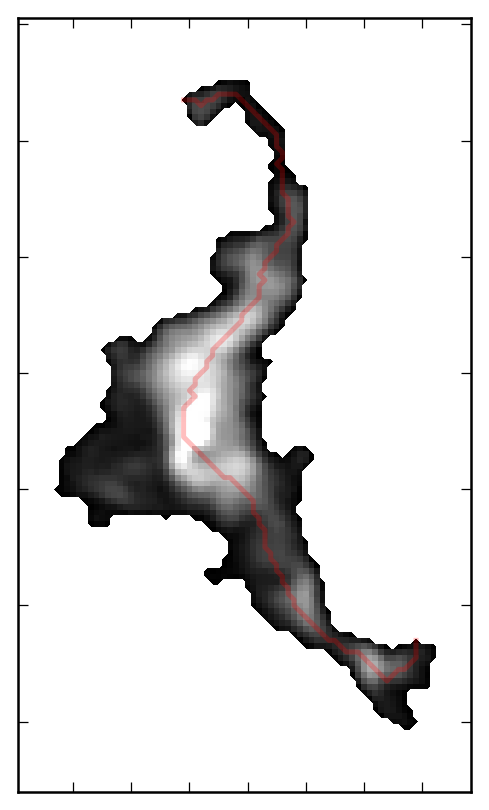

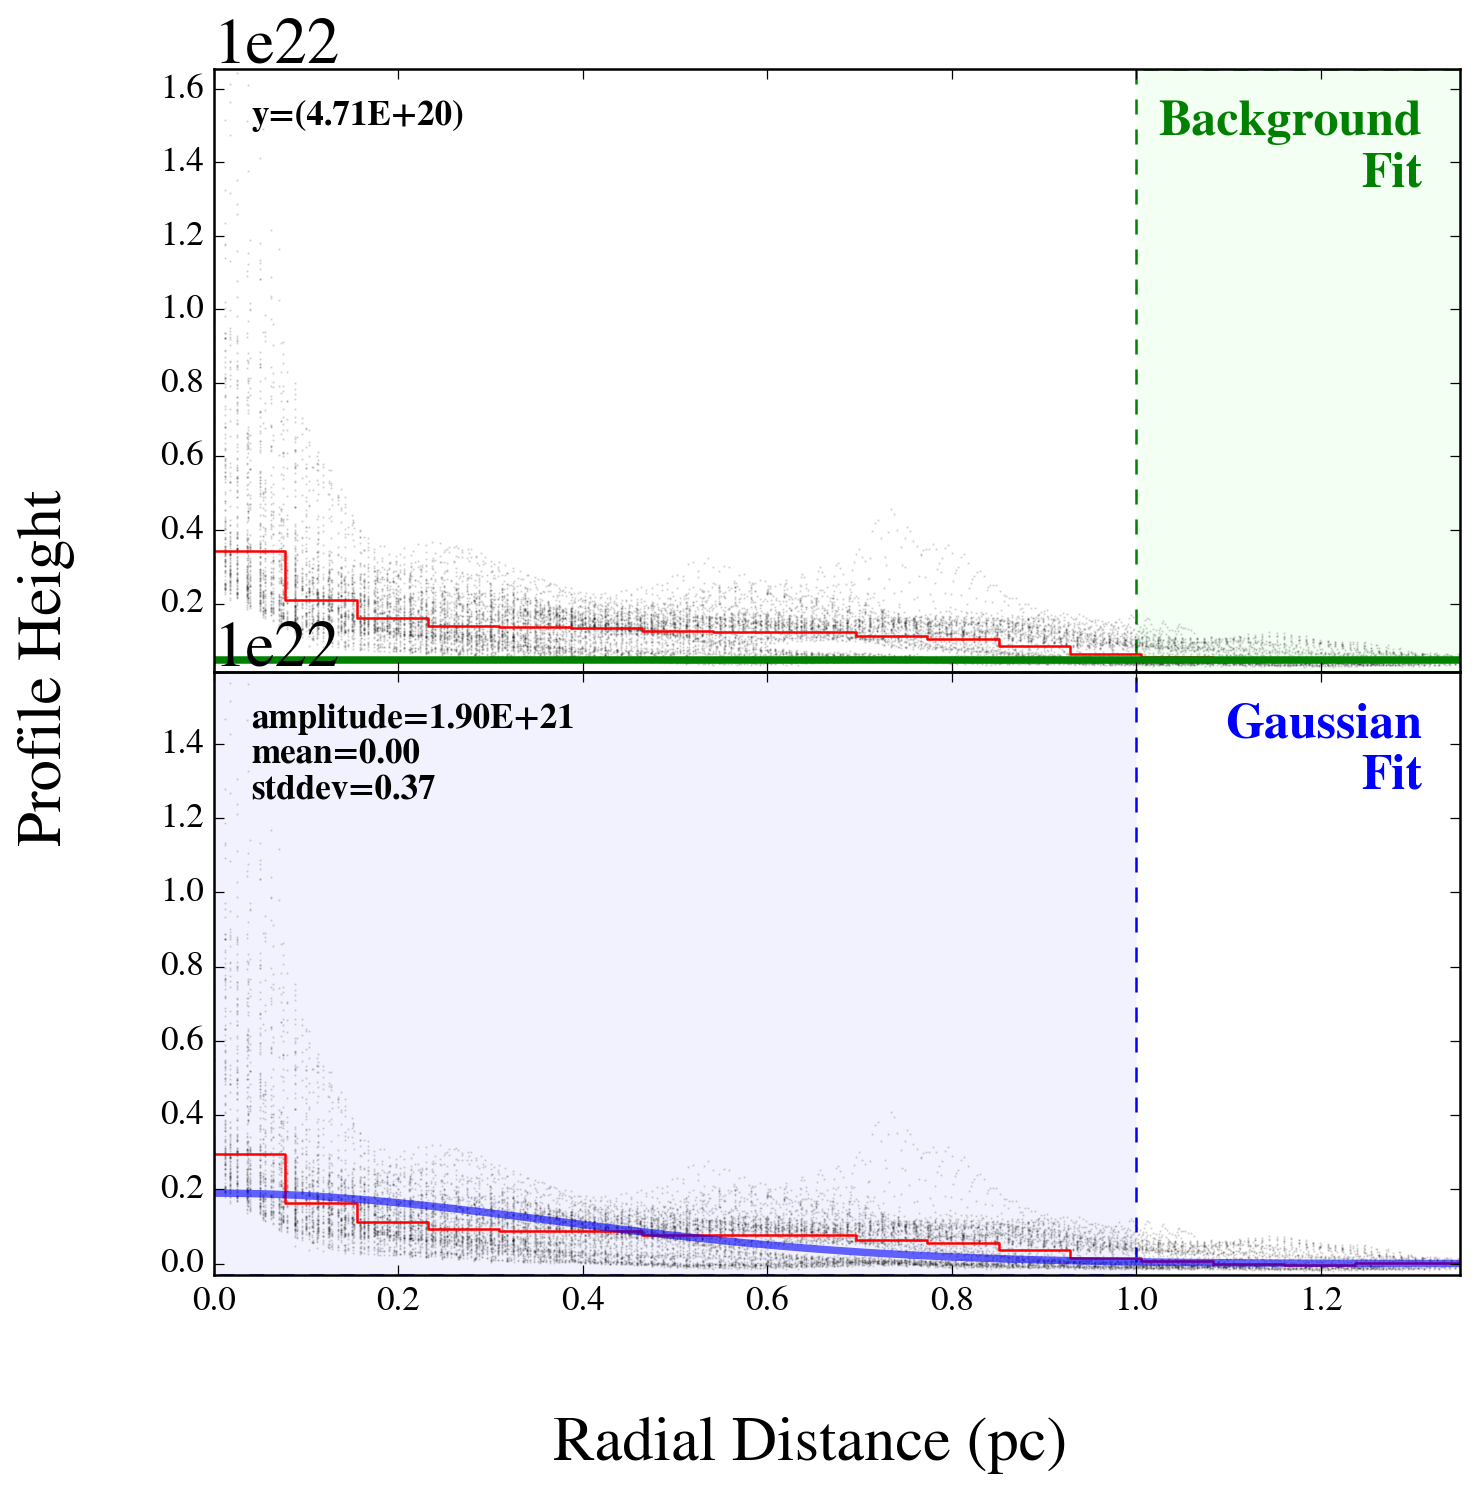

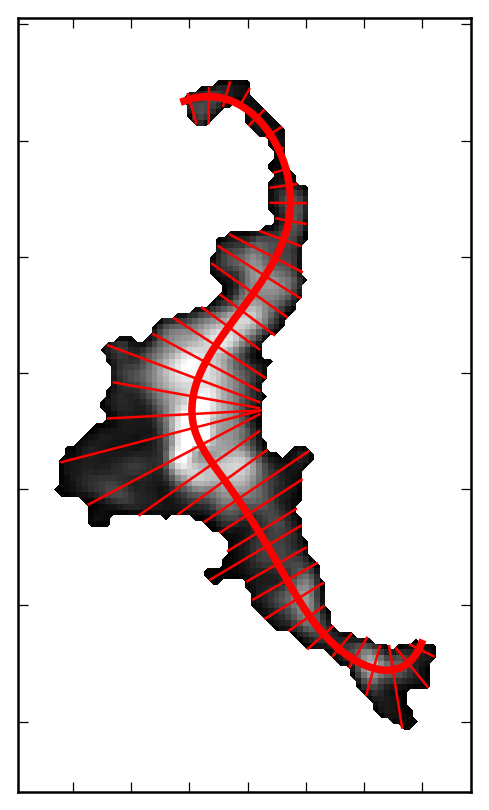

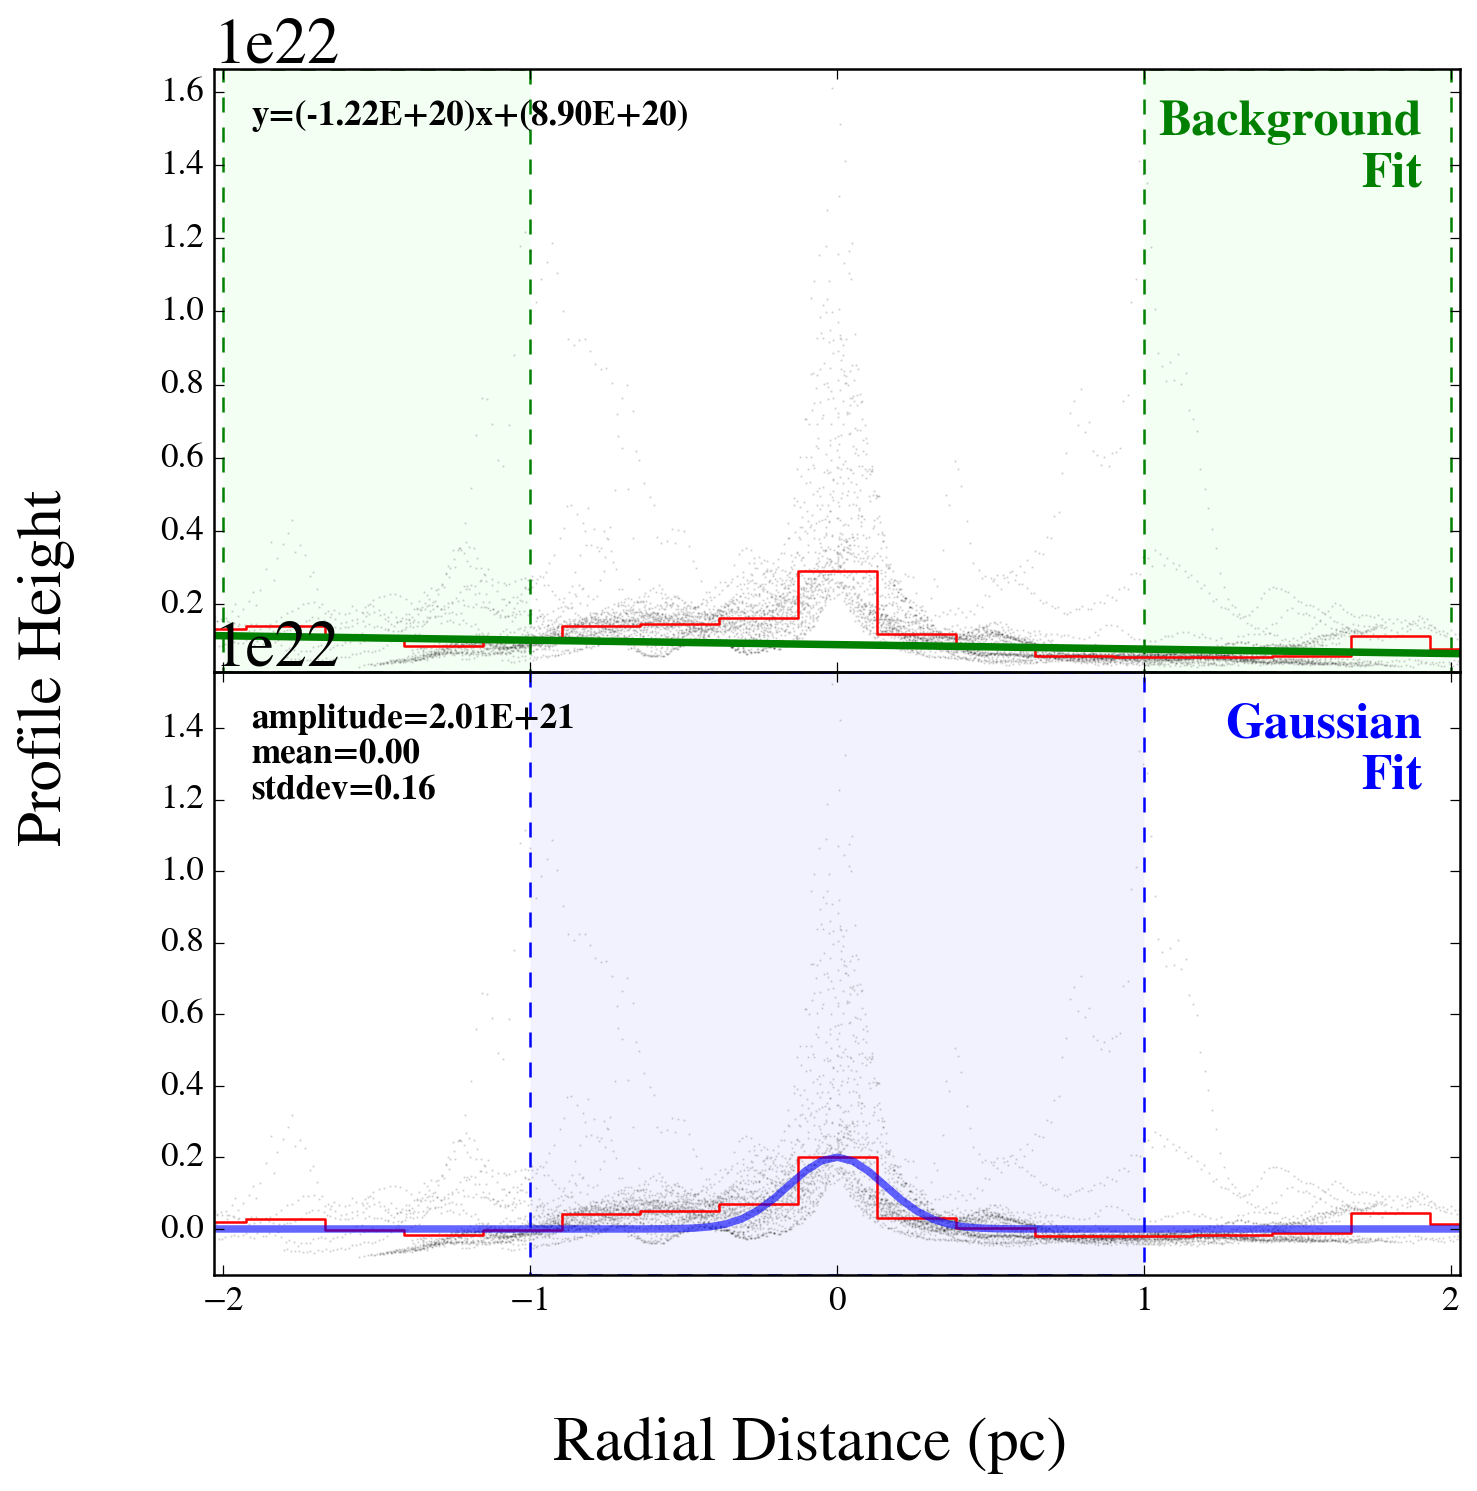

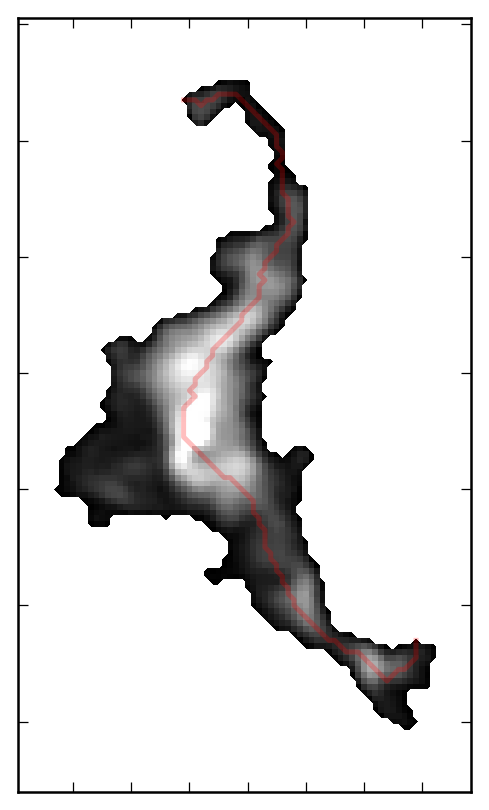

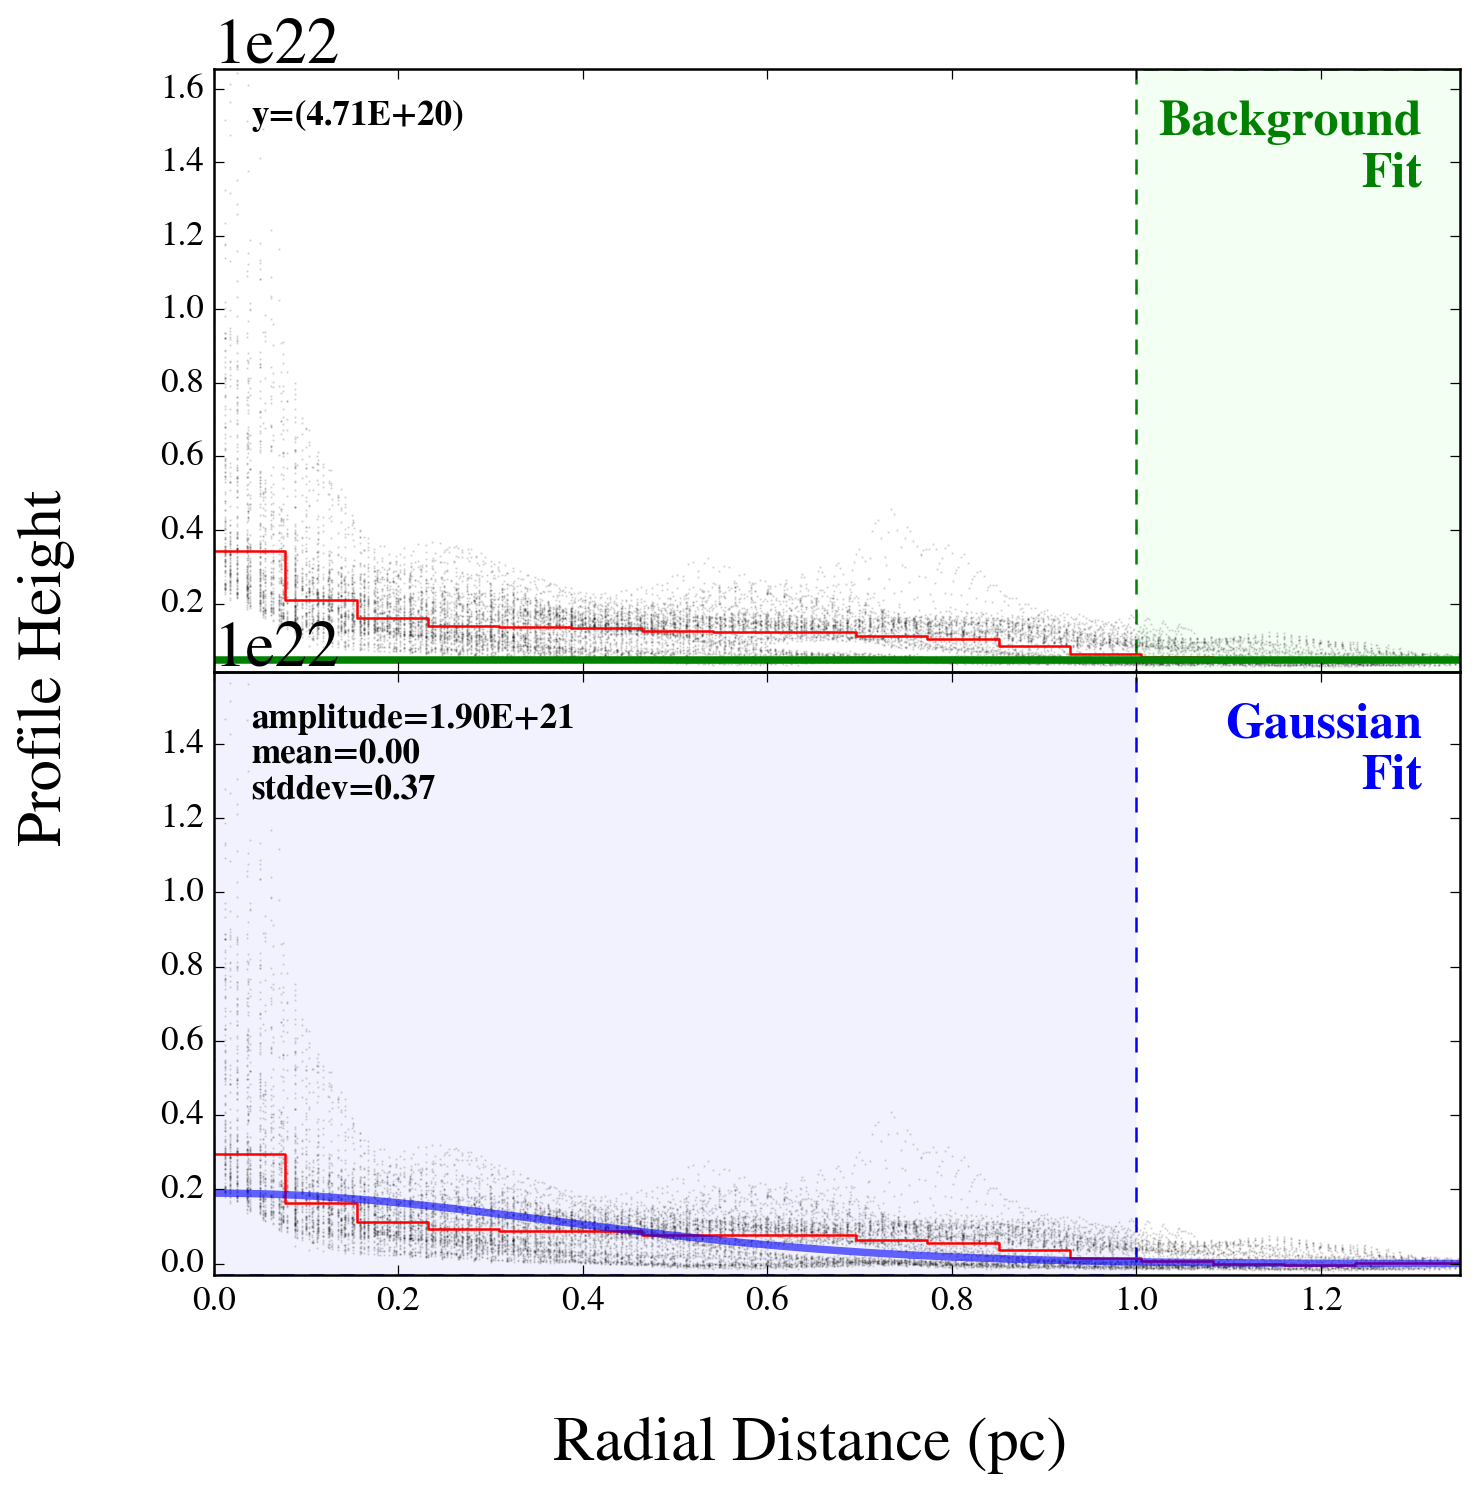

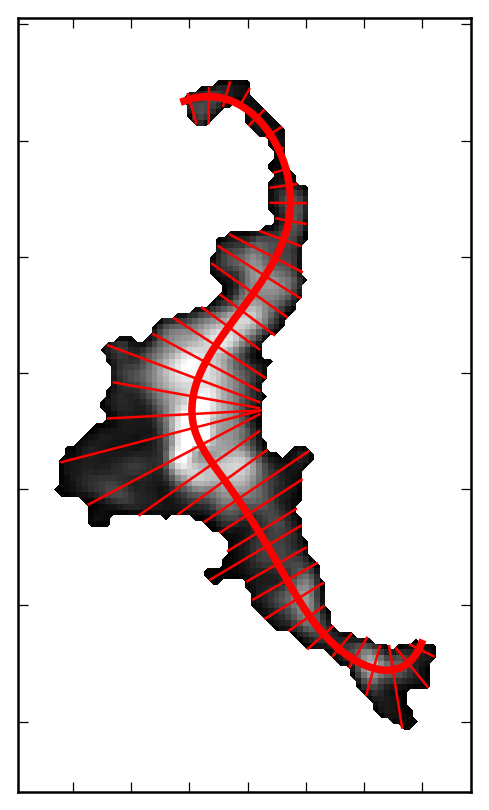

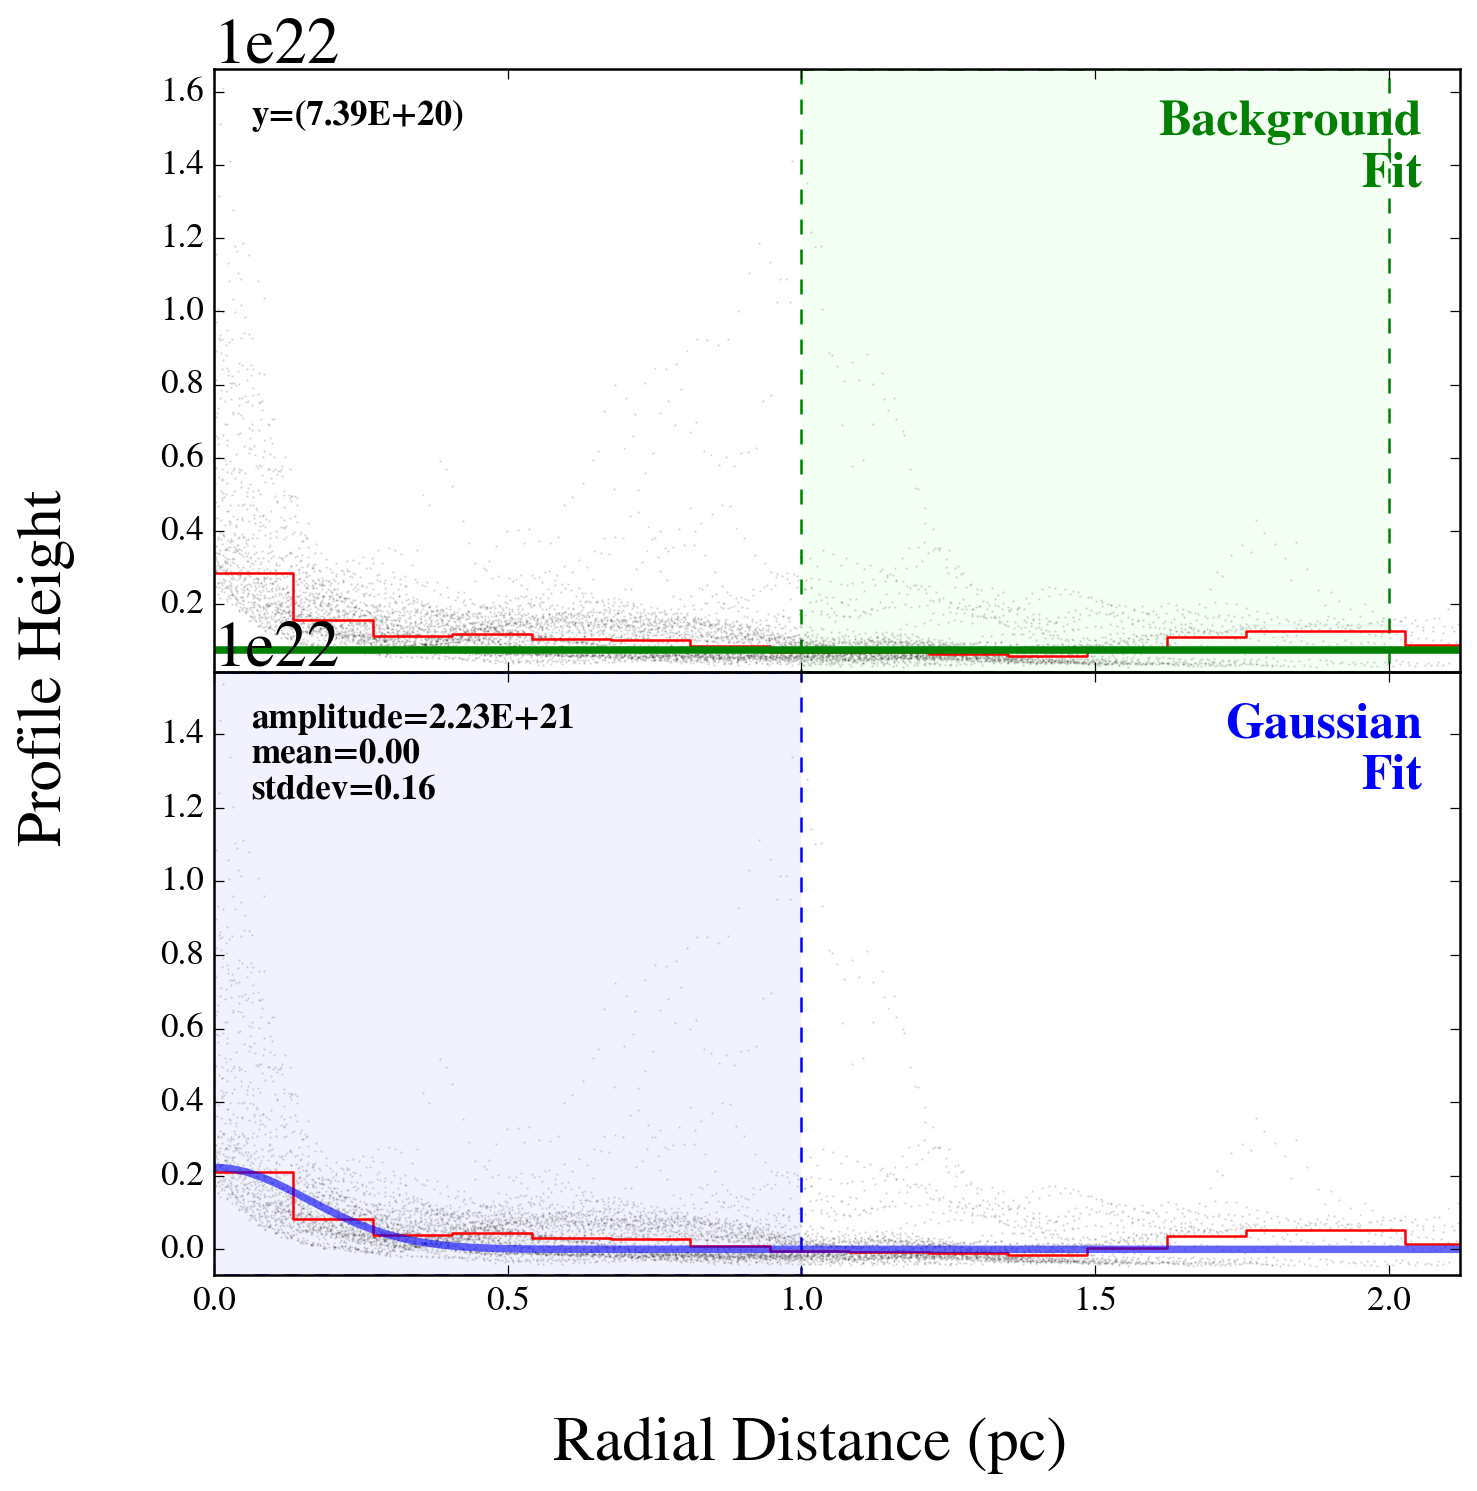

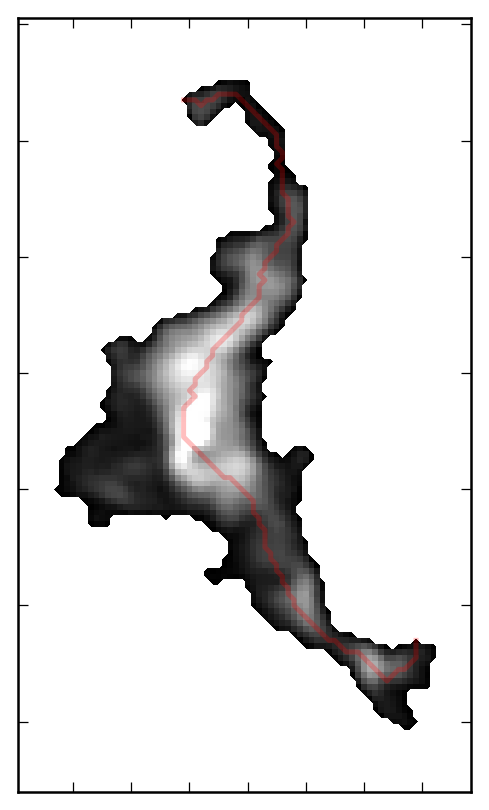

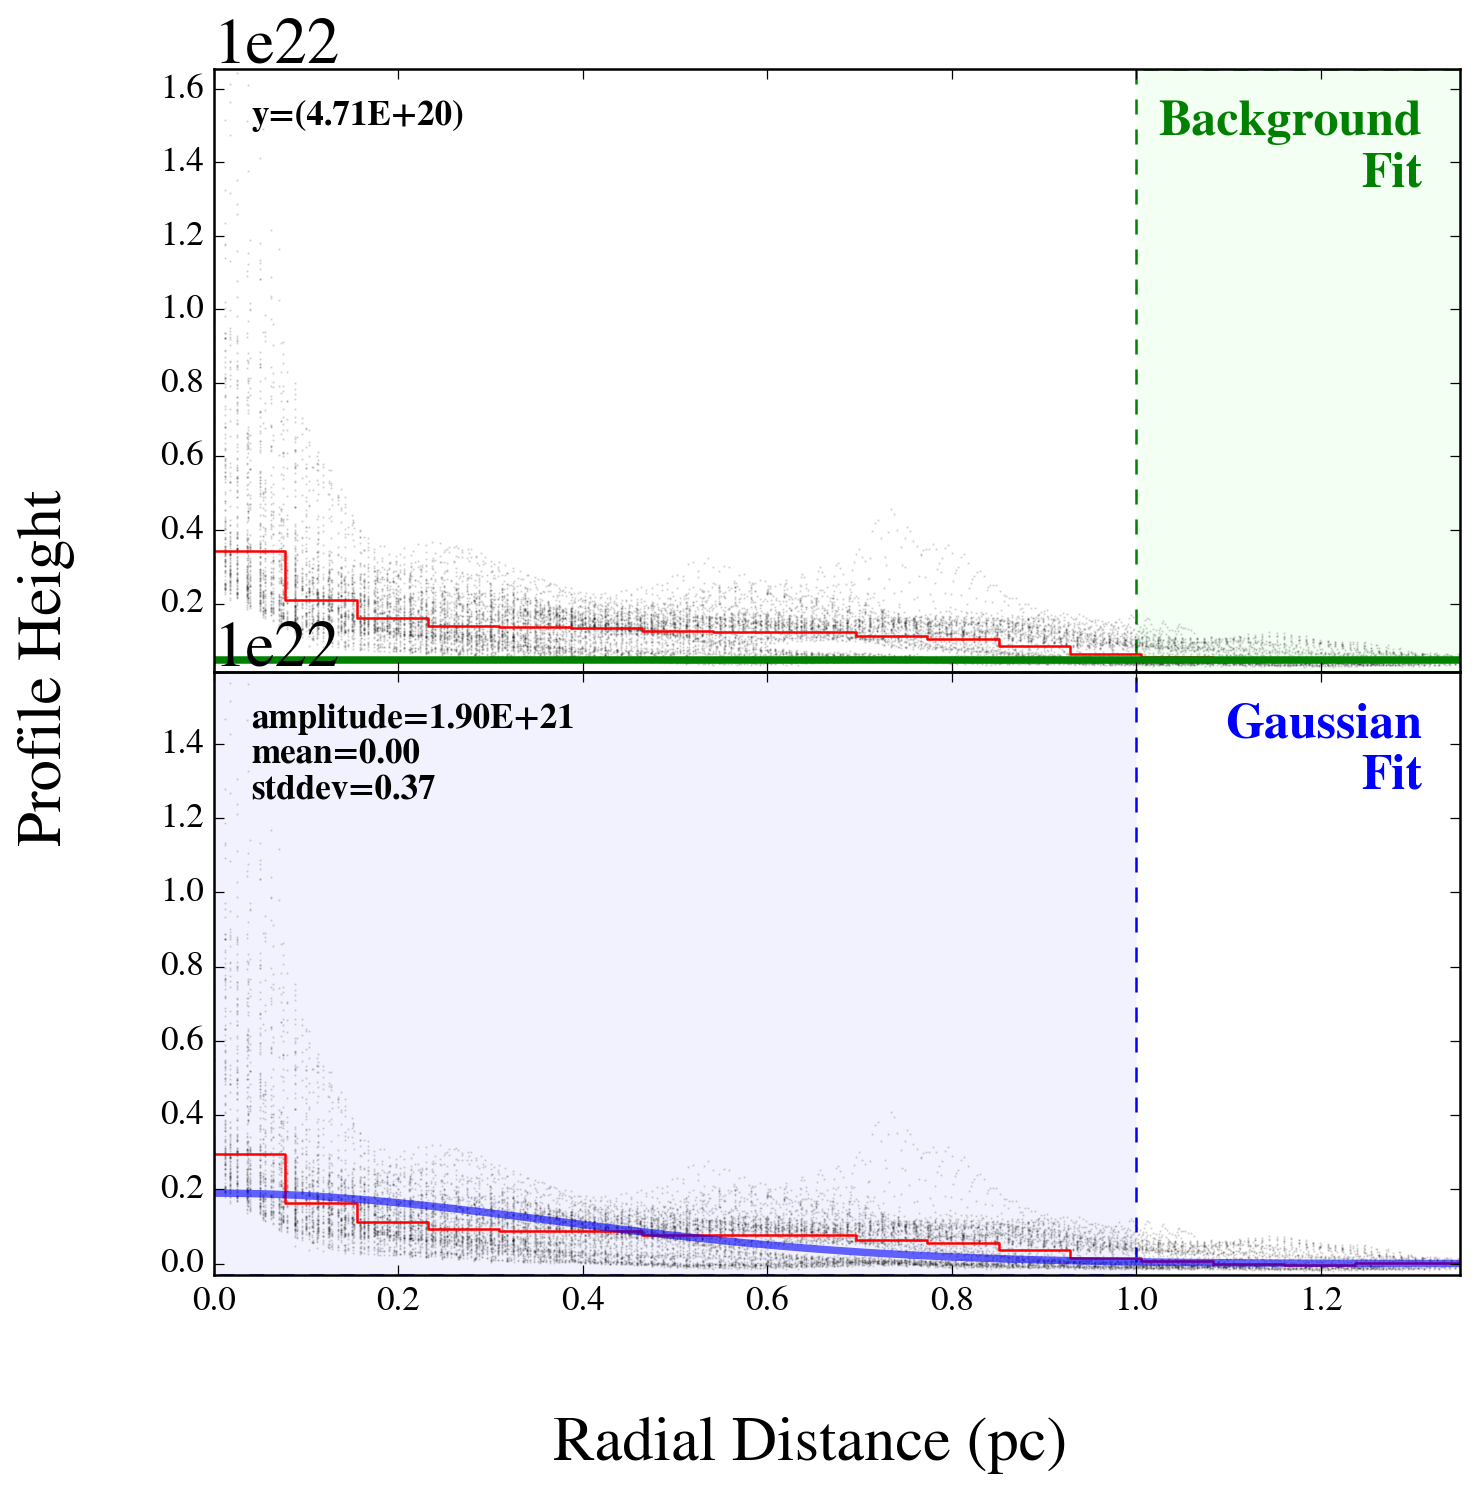

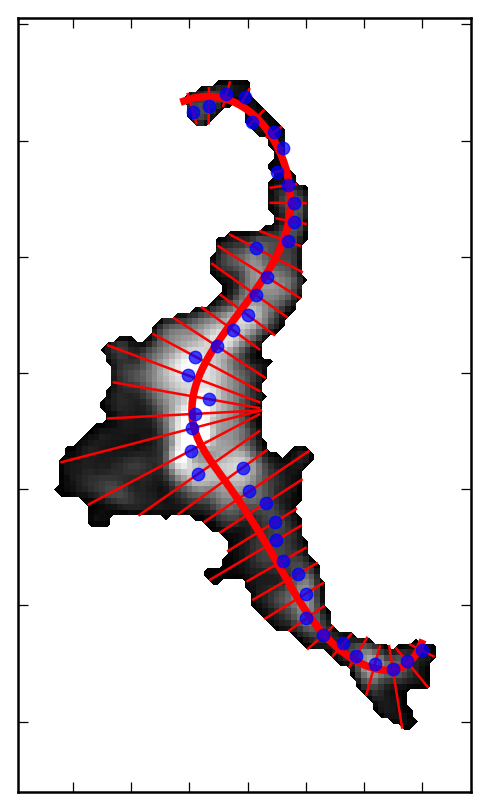

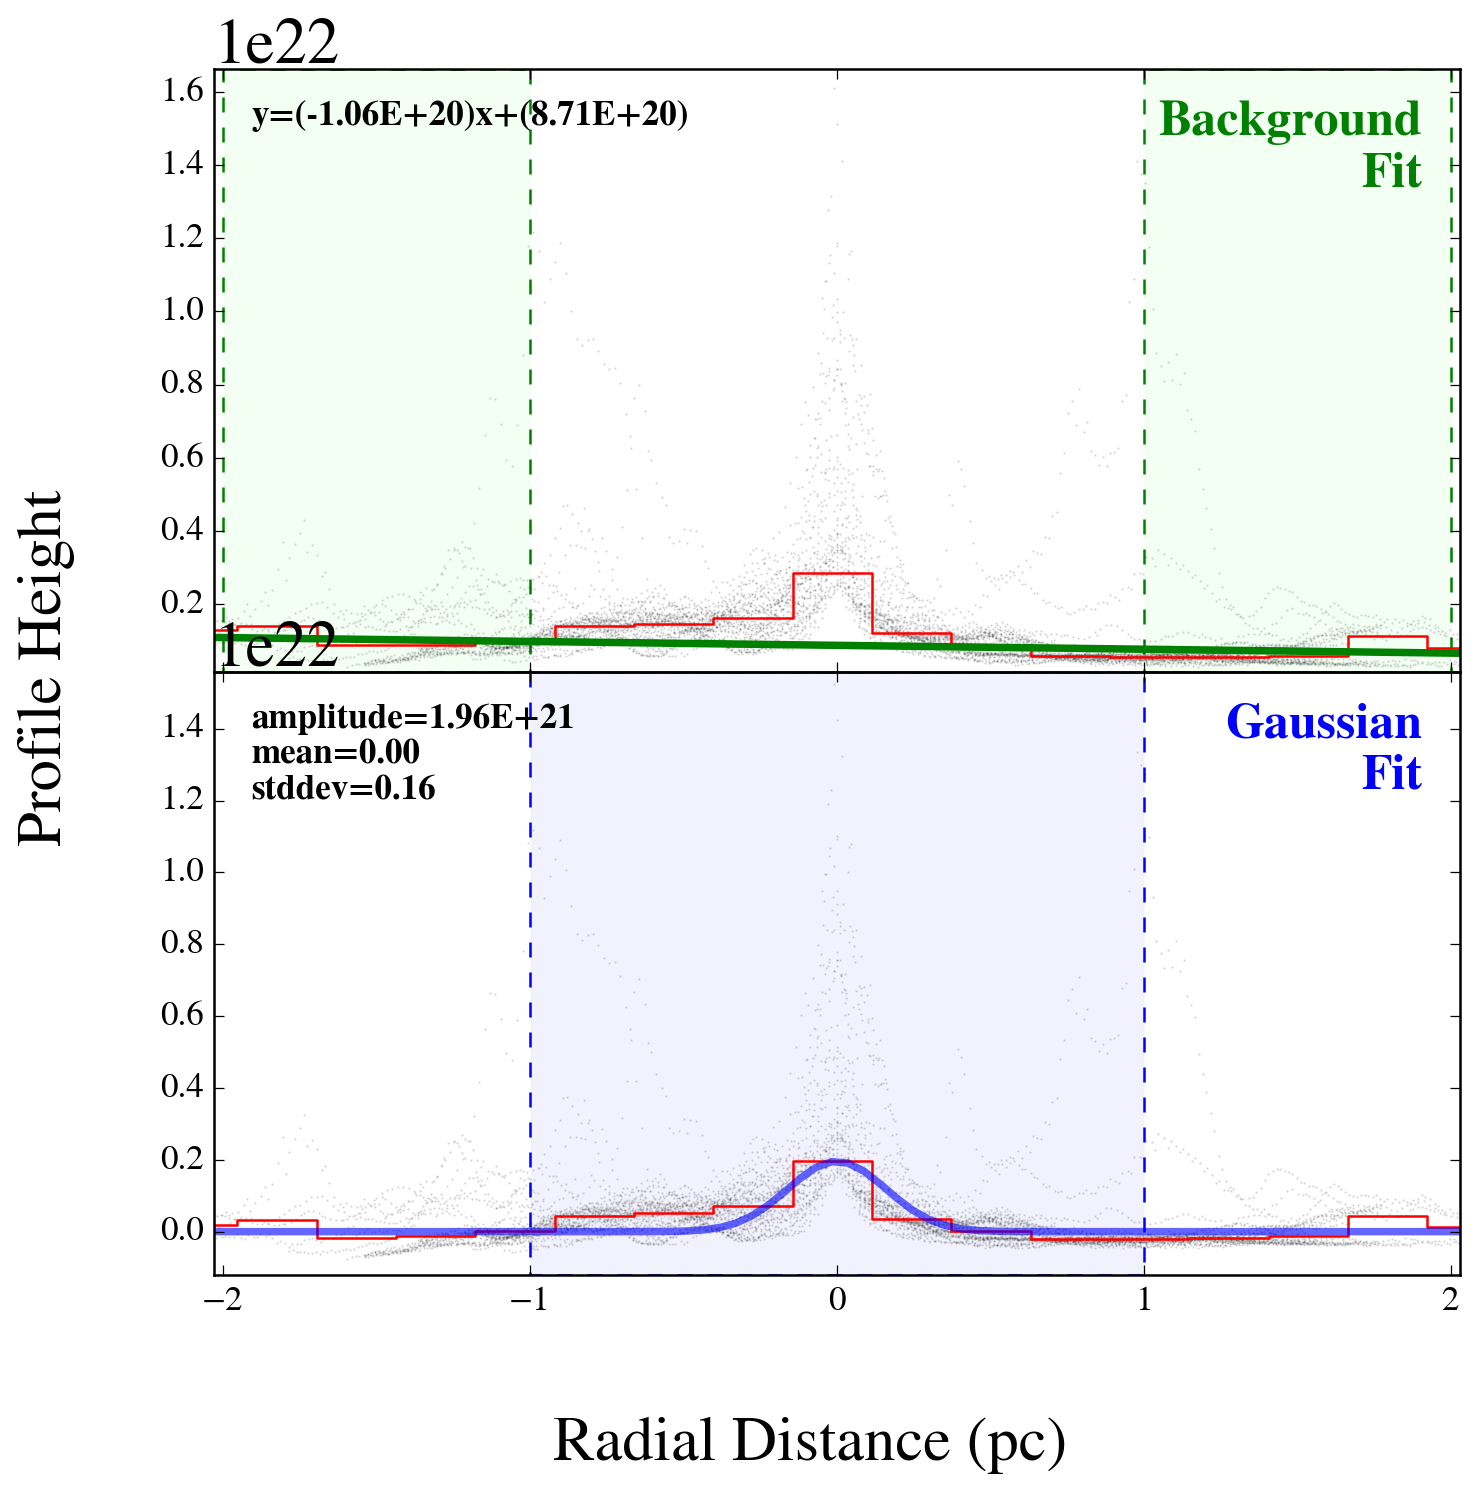

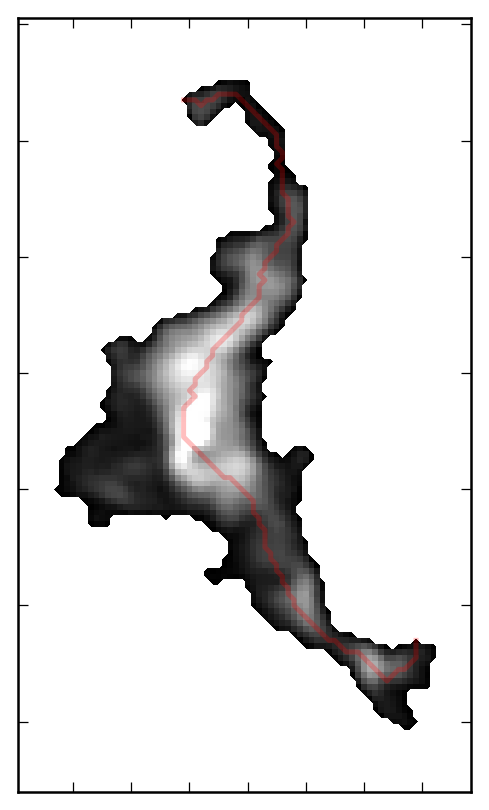

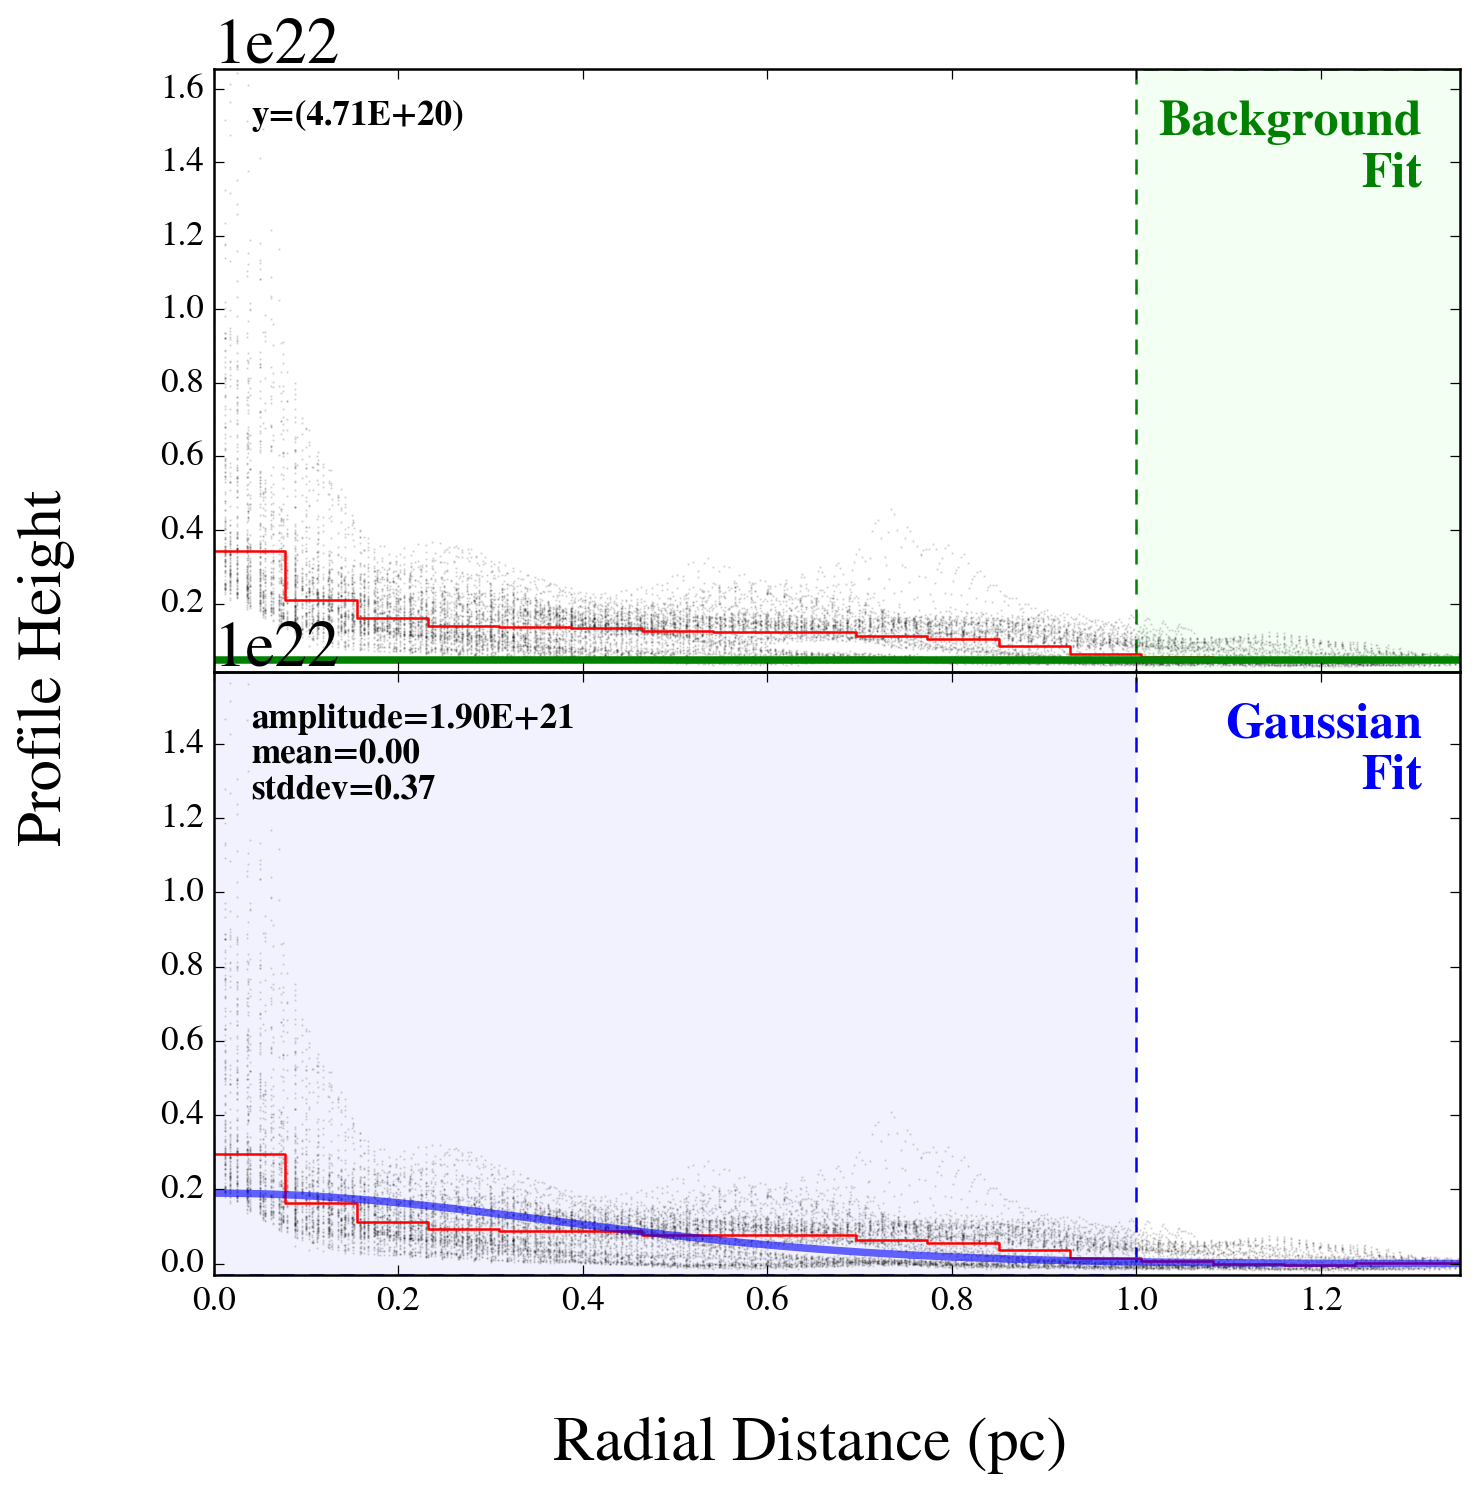

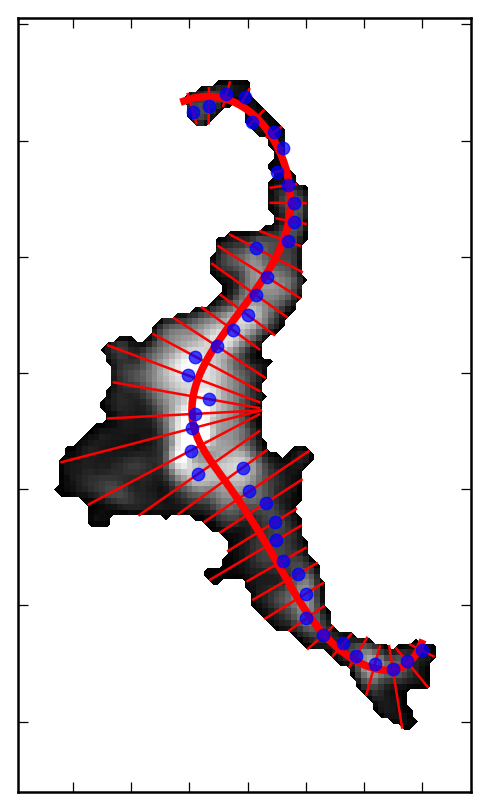

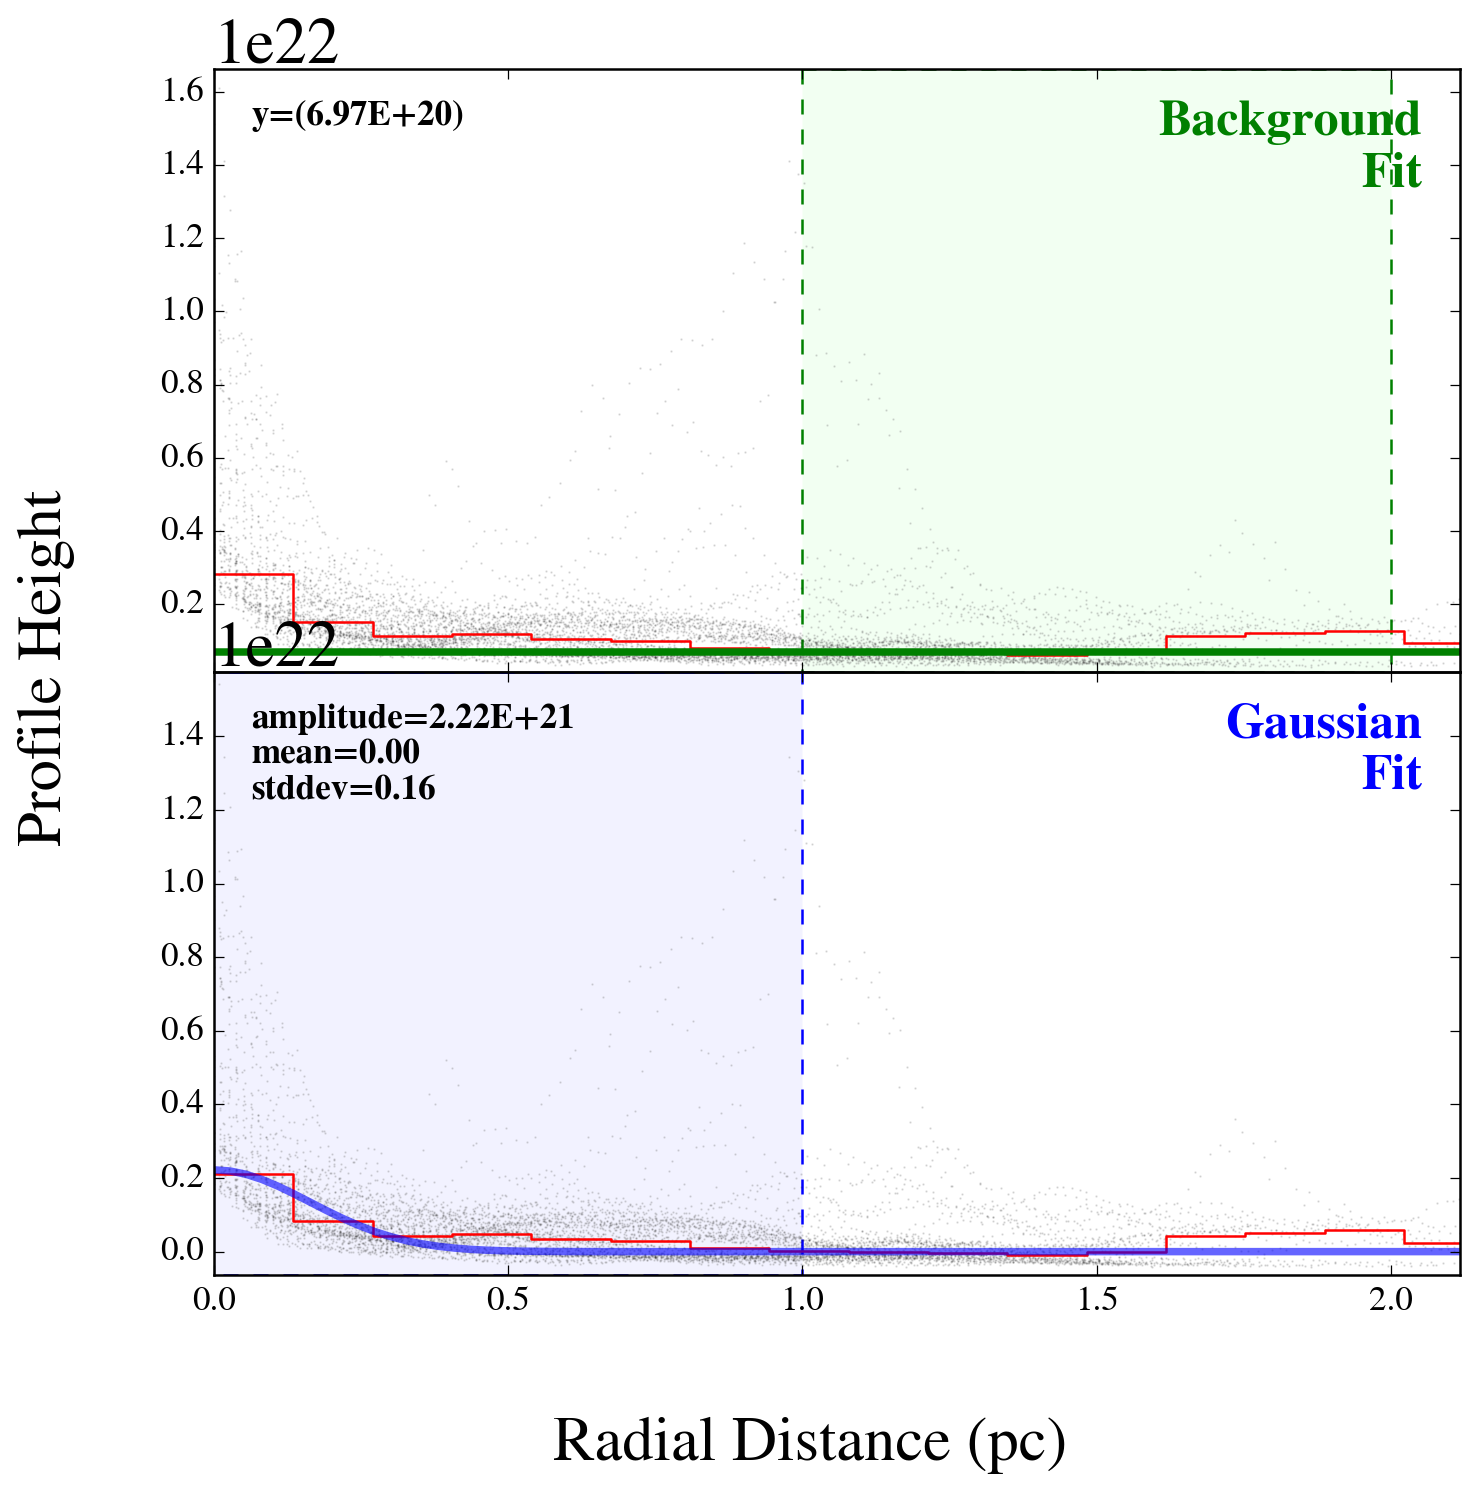

In [5]:
# (supress plotting for the moment)
## %matplotlib auto

# tests
for i in range(16):
    ## Set up the parameters.
    setup = format(i, '004b')
    bins = (bins0 if bool(int(setup[0])) else None)
    shift, wrap, cut = bool(int(setup[1])), bool(int(setup[2])), bool(int(setup[3]))
    
    ## Test!!
    try:
        ## build_profile
        startTime = time.time()
        radfil.build_profile(bins = bins,
                             shift = shift,
                             wrap = wrap,
                             cut = cut)
        
        ## fit_profile
        radfil.fit_profile(bgdist = bgdist,
                           fitdist = fitdist,
                           fitfunc = fitfunc)
        
        print '----'
        print 'bins:', bins, '; shift:', shift, '; wrap:', wrap, '; cut:', cut
        print 'runtime: %.2f'%(time.time() - startTime)
        print '----'
    
    ## Carry on when any exceptions happen.
    except StandardError:
        print '----'
        print 'bins:', bins, '; shift:', shift, '; wrap:', wrap, '; cut:', cut
        print 'Setup parameters raise an error.'
        print '----'
        
        continue